# Project: Ensemble Techniques - Term Deposit Subscription Prediction
***
## Background:

The increasing number of marketing campaigns over time has diminished their impact on the
general public. Mainly, due to competition, positive response rate to mass campaigns are
usually very low. According to a recent studies, less than 1% of the contacts will subscribe a term deposit. <br/> 
As well as, direct marketing has drawbacks, such as causing negative attitude towards banks due to intrusion of privacy. 
In order to save costs and time, it is important to filter the contacts but keep a certain success rate. <br/>

In this project, the goal is to built a Machine Learning Model, using historical data collected from existing customers in order
to help the marketing team to identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. <br/>
To built this ML model that will be used to increase the Bank's campaign efficiency, by predicting whether the campaign will be successful to a certain client, namely, whether the client will subscribe a term deposit, the main factors that affect the success of a campaign must be identified. So the deliverables of the Project are the following: <br/>

Deliverable – 1 (Exploratory Data Analysis and Quality Report) <br/>
Deliverable – 2 (Preparation of the data for analytics) <br/>
Deliverable – 3 (Create and Evaluate ML Models - Built and conclude on the best Ensemble model) <br/>

The Project's data were collected from a Portuguese marketing campaign related with bank deposit subscription for 45211 clients and 17 features, and the response (target, y) is whether the client has subscribed a term deposit
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


# Deliverable – 1 Exploratory data quality report
## Univariate Analysis-Strategies and Comments for Data and Comments: <br>


# A. Attributes Description: <br>

## Input Variables <br>


# Basic client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.

# Campaign Data:
<a id="last_contact"></a>
9 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
10 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
13 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
16 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

# Output variable (desired target):<br>

17 - **Target -y-** - has the client subscribed a term Target? (binary: 'yes','no')

In [1]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import os
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

In [4]:
df= pd.read_csv('bank-full.csv')
#df = df.copy()
print('Shape of Bank Dataframe is ',df.shape)
print(list(df.columns))

Shape of Bank Dataframe is  (45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']



###  Basic info of the dataset
Data types and description of the independent attributes including (name, meaning, range of values observed, central values(mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.<br><br>

In [5]:
df.head() #check data for anamolies

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [6]:
df.tail() #check data for anamolies

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# null values sum
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
df.shape

(45211, 17)

In [10]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype=object)

In [11]:
df.dtypes 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [12]:
# Finding unique data
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

### Describe Data
There are <b>catogerical attributes</b> in the data set which needs to be formated properly

In [13]:
print('Jobs:\n', df['job'].unique())
df.job.value_counts()

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
print('marital:\n', df['marital'].unique())
df.marital.value_counts()

marital:
 ['married' 'single' 'divorced']


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [15]:
print('education:\n', df['education'].unique())
df.education.value_counts()

education:
 ['tertiary' 'secondary' 'unknown' 'primary']


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [16]:
print('default:\n', df['default'].unique())
df.default.value_counts()

default:
 ['no' 'yes']


no     44396
yes      815
Name: default, dtype: int64

In [17]:
print('housing:\n', df['housing'].unique())
df.housing.value_counts()

housing:
 ['yes' 'no']


yes    25130
no     20081
Name: housing, dtype: int64

In [18]:
print('loan:\n', df['loan'].unique())
df.loan.value_counts()

loan:
 ['no' 'yes']


no     37967
yes     7244
Name: loan, dtype: int64

In [19]:
print('contact:\n', df['contact'].unique())
df.contact.value_counts()

contact:
 ['unknown' 'cellular' 'telephone']


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [20]:
print('month:\n', df['month'].unique())
df.month.value_counts()

month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [21]:
print('poutcome:\n', df['poutcome'].unique())
df.poutcome.value_counts()

poutcome:
 ['unknown' 'failure' 'other' 'success']


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [22]:
print('Target:\n', df['Target'].unique())
df.Target.value_counts()

Target:
 ['no' 'yes']


no     39922
yes     5289
Name: Target, dtype: int64

### Exploratory data quality report
data types and description of the independent attributes including (name, meaning, range of values observed, central values(mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

In [23]:
df.describe().T.round(1) # Summary of numerical attributes of the file

count    mean     std     min    25%    50%     75%       max
age       45211.0    40.9    10.6    18.0   33.0   39.0    48.0      95.0
balance   45211.0  1362.3  3044.8 -8019.0   72.0  448.0  1428.0  102127.0
day       45211.0    15.8     8.3     1.0    8.0   16.0    21.0      31.0
duration  45211.0   258.2   257.5     0.0  103.0  180.0   319.0    4918.0
campaign  45211.0     2.8     3.1     1.0    1.0    2.0     3.0      63.0
pdays     45211.0    40.2   100.1    -1.0   -1.0   -1.0    -1.0     871.0
previous  45211.0     0.6     2.3     0.0    0.0    0.0     0.0     275.0

### Numeric Attributes

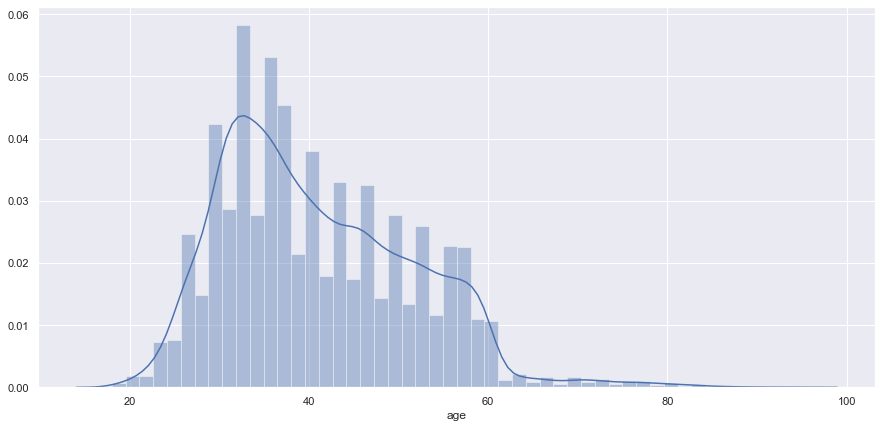

In [24]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.distplot(df['age'])

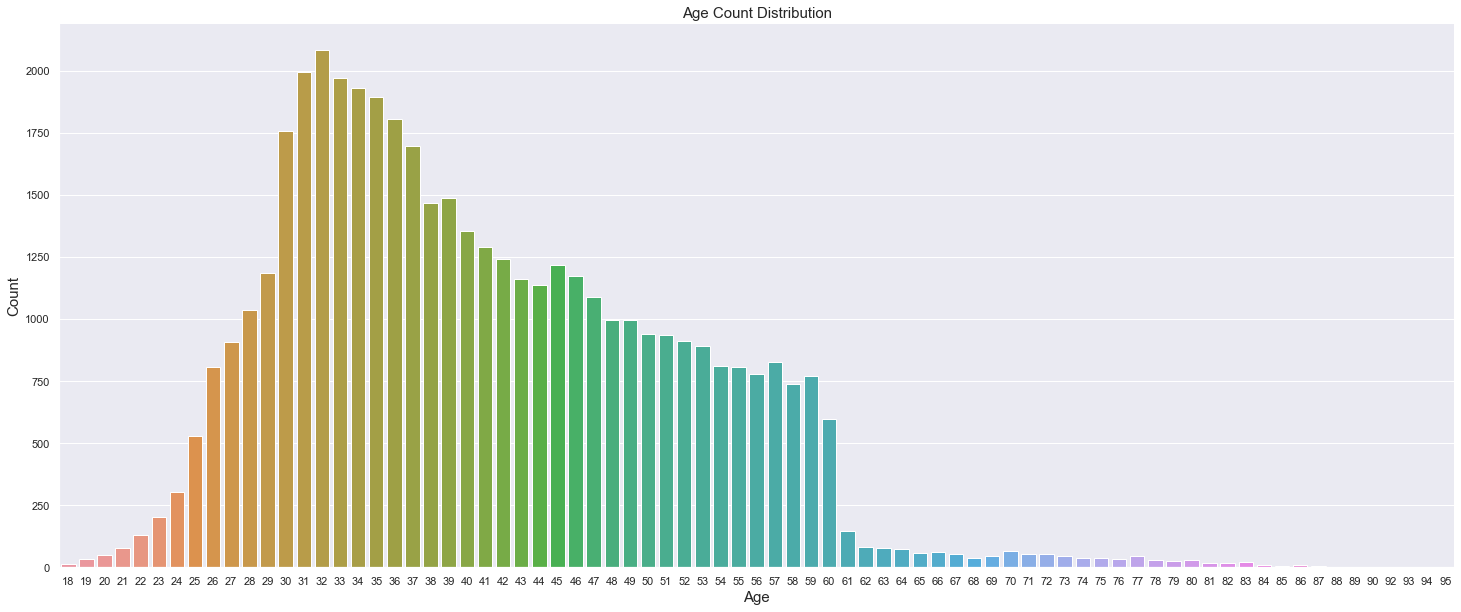

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'age', data =  df[df.columns])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

<B><U>AGE</B></U>

In [26]:
a1=df[(df['age']>=18) & (df['age']<=28)]
a2=df[(df['age']>=29) & (df['age']<=39)]
a3=df[(df['age']>=40) & (df['age']<=50)]
a4=df[(df['age']>=51) & (df['age']<=60)]
a5=df[(df['age']>=61)]

total=[]
list1=[a1,a2,a3,a4,a5]
for i in list1:
  total.append(i.shape[0])
yes_count=[]
for i in list1:
  yes_count.append(i[i['Target']=='yes'].count()['Target'])

age_final=pd.DataFrame()
age_final['Age Groups']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percetage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percetage',ascending=False)

Age Groups  Total  Yes Count  Percetage
4        61+   1188        502  42.255892
0      18-28   4088        757  18.517613
1      29-39  19274       2084  10.812494
3      51-60   8067        811  10.053304
2      40-50  12594       1135   9.012228

## Identifying Outliers in Numeric columns

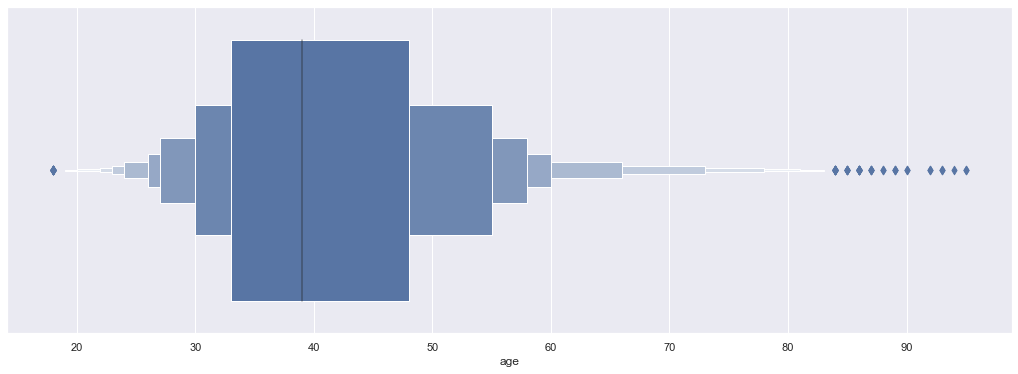

In [27]:
#Identifying Outliers in Age column
plt.figure(figsize = (18,6))
sns.boxenplot(df['age'])

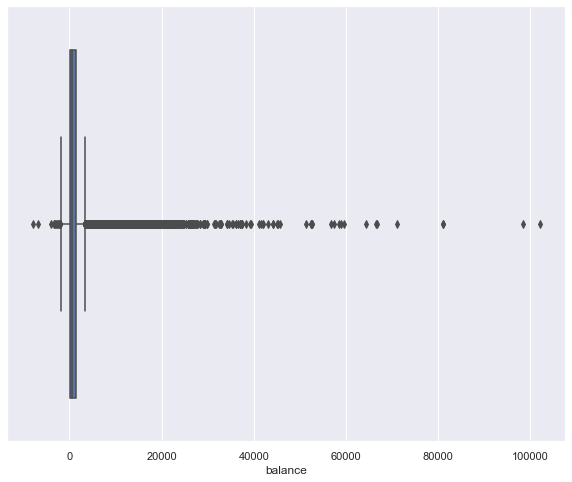

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(df['balance'])

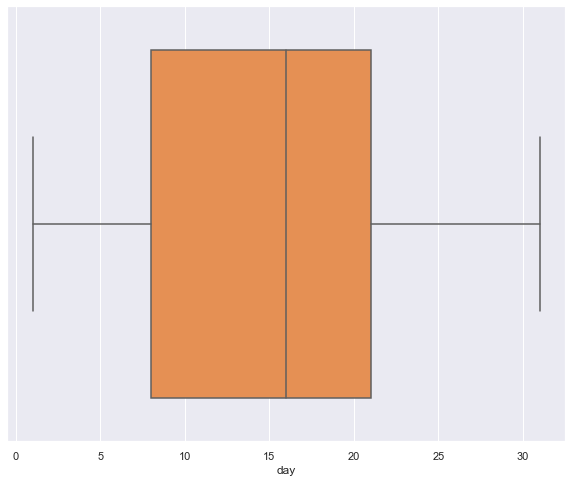

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(df['day'], palette="Oranges")

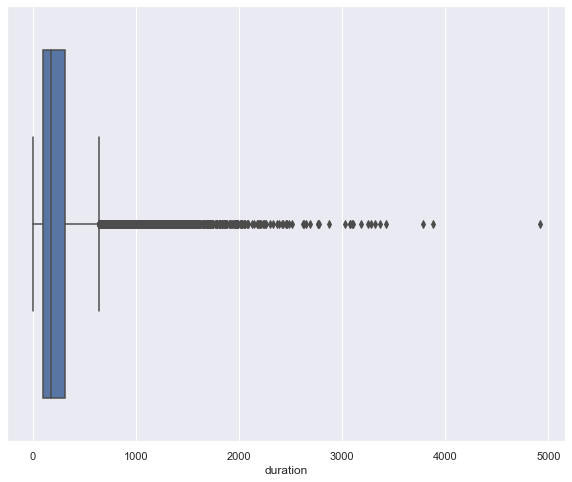

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(df['duration'])

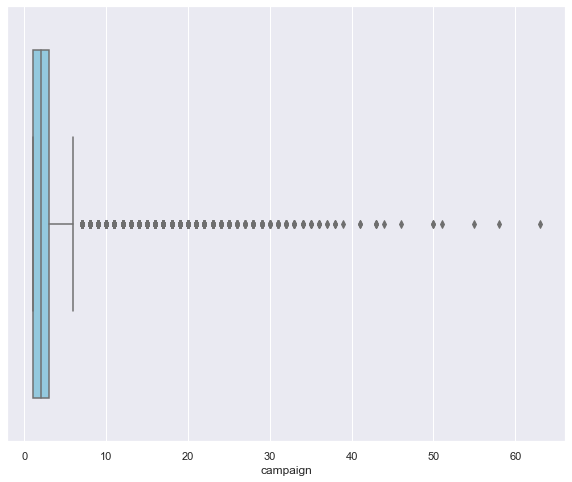

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.boxplot(df['campaign'], color="skyblue")

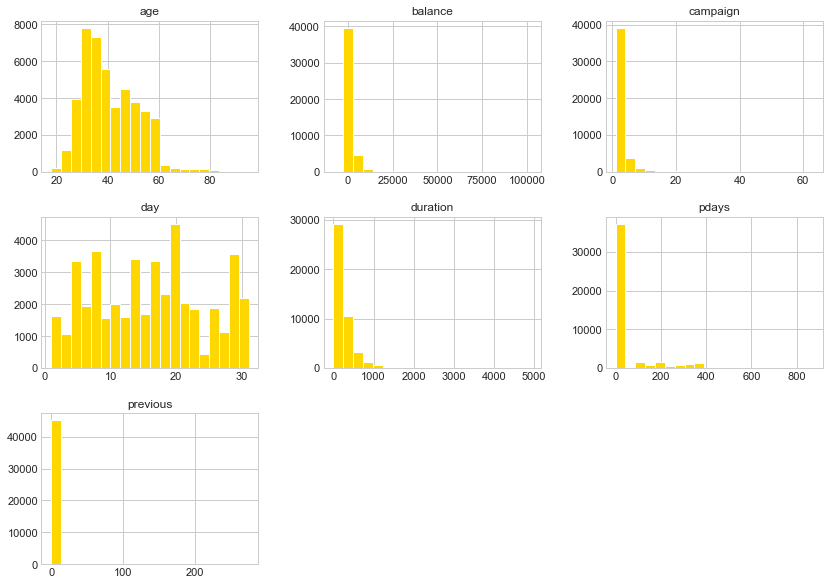

In [32]:
#Numerical Values Distribution.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='gold')
plt.show()

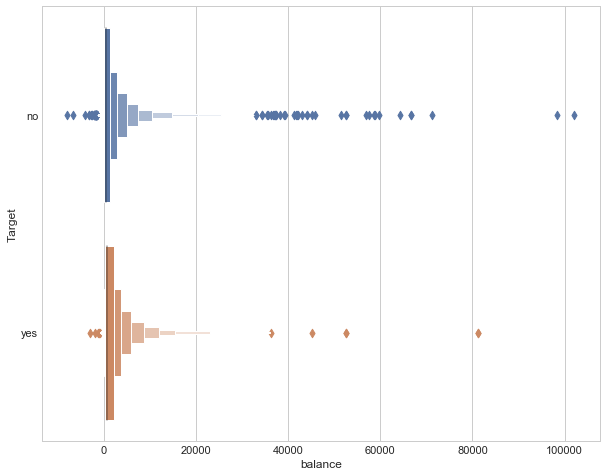

In [33]:
plt.figure(figsize = (10,8))
sns.boxenplot(data=df, x="balance", y="Target")
plt.show()

In [34]:
df[df['pdays']==-1]

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45203   23       student    single   tertiary      no      113      no   no   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45203   cellular   17   nov       266         1     -1         0  unknown   
45205   cellular   17   nov       386         2     -1         0  unknown   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45209  telephone   17   nov       508         4     -1         0  unknown   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45203    yes  
45205    yes  
45206    yes  
45207    yes  
45209     no  

[36954 rows x 17 columns]

In [35]:
df[(df['pdays']!=-1) & (df['poutcome']=='unknown')]

age         job  marital  education default  balance housing loan  \
40658   61     retired  married   tertiary      no     3140     yes  yes   
41821   39  management  married   tertiary      no      184      no   no   
42042   26      admin.   single  secondary      no      338      no   no   
43978   30  technician   single  secondary      no      254     yes  yes   
45021   37  management  married  secondary      no      209      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
40658  cellular    6   aug       975         4     98         1  unknown   
41821  cellular   15   oct       206         1    168         5  unknown   
42042  cellular   29   oct       209         1    188         2  unknown   
43978  cellular   24   jun       167         3    416         2  unknown   
45021  cellular   14   oct       183         3    528         7  unknown   

      Target  
40658    yes  
41821     no  
42042    yes  
43978     no  
45021     no

## Comments 1: on Numerical Variables
***
There are no missing values

* Age
  - Mean - aproximately 41 years old
  - Standard Dev - 10.6
  - first quantile - 33
  - Median or Second quantile - 39
  - As mean is higher than median Age is slightly rightly skewed.
  
 
* balance
  - Mean - 1362.2
  - Standard Dev - 3044.7 is a very high number so we can understand through this that the balance is heavily
    distributed across the dataset.
  - first quantile - 72
  - Median or Second quantile - 448
  - Balance is highly rightly skewed
  
* day
  - Mean - 15.8
  - Standard Dev - 8.3
  - first quantile - 8
  - Median or Second quantile - 16
  
* duration
  - Mean - 258.1
  - Standard Dev - 257.5
  - first quantile - 103
  - Median or Second quantile - 180

<b>From the above barplot it is clear that,</b> the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.
<b>There is no strong relation</b> between Balance and target variable

## Strategy 1

A. It will be better to drop the 'duration' as:<br>
It is highly correlated in whether a potential client will buy a term Target, because the more the Bank talks to a target client the higher the probability the target client will open a term Target since a higher 'duration' means a higher interest (commitment) from the potential client. </li><br> 
Also, duration is obtained after the call is made to the potential client</b> so if the target client has never received calls, this feature is not that useful. 

B. Most of the customers of the bank in this dataset are in the age range of 30–40 however the average age of customers who bought the term deposit is different than that of the customers who didn’t. So it is good to create Age Groups (as was developed above) in order to identify the approprite target ages that responde better to the campaigns and study them further.

C.<b>If pdays=-1 ,-1 means client was not previously contacted.</b>
Therefore 36954 clients were not contacted in previous campaigns. 
<b>We also have 5 clients</b> that were contacted in previous campaign but their outcome is mentioned as unknown<br>
These must be taken into account during preparing the data<br><br>

<b><u>Identifying Outliers at 'Day' and 'Campaign' Numeric columns</u><b>

<b><u> Distribution plot at 'Day' and 'Campaign' Numeric columns</u><b>

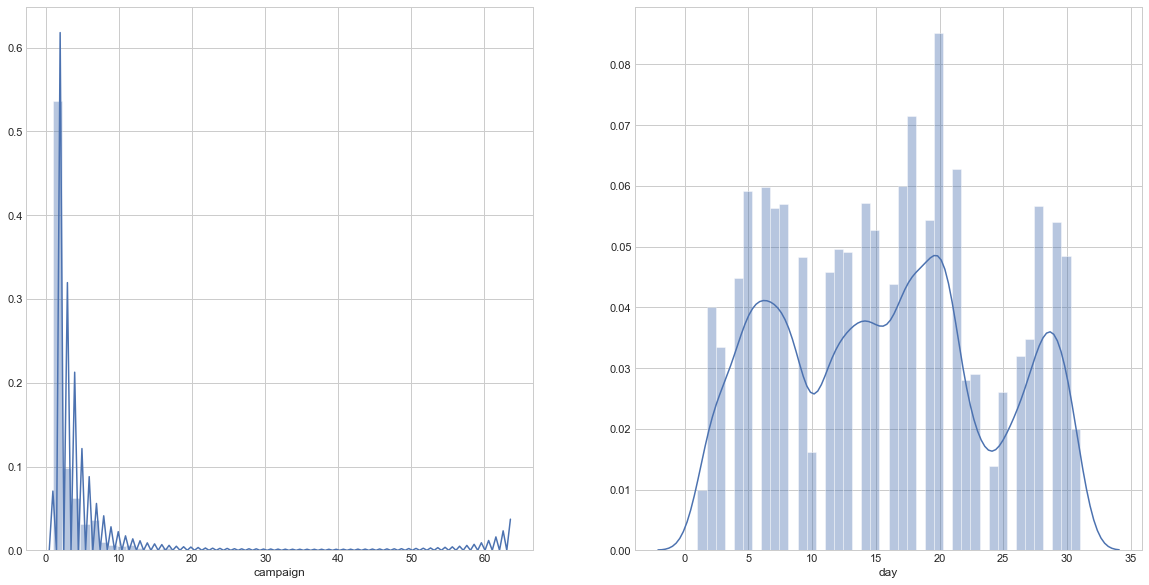

In [36]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df['campaign'],ax=ax[0])
sns.distplot(df['day'])

## Categorical Variables

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

<B><U>JOB</B></U>

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')



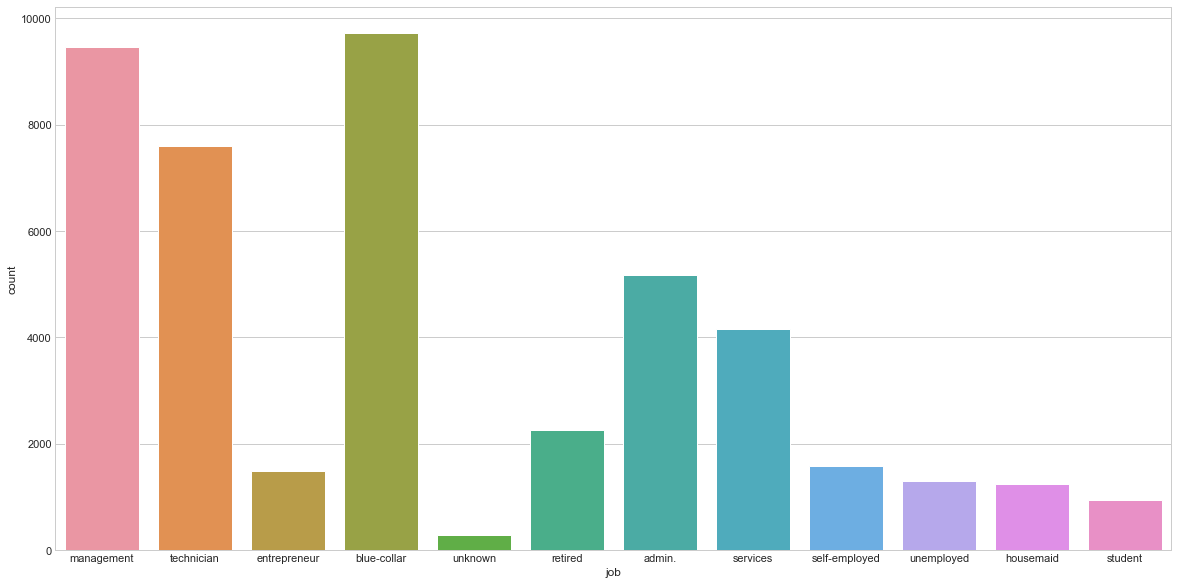

In [37]:
print(df['job'].value_counts().index)
print()
plt.figure(figsize = (20,10))
sns.countplot(df['job'])

In [38]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=df[df['job']==i]
  title.append(i)
  total_count_in_each_group.append(df_job.shape[0])
  yes_count.append(df_job[df_job['Target']=='yes'].count()['Target'])
  no_count.append(df_job[df_job['Target']=='no'].count()['Target'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs



Job Title  Total   Yes    No
0     blue-collar   9732   708  9024
1      management   9458  1301  8157
2      technician   7597   840  6757
3          admin.   5171   631  4540
4        services   4154   369  3785
5         retired   2264   516  1748
6   self-employed   1579   187  1392
7    entrepreneur   1487   123  1364
8      unemployed   1303   202  1101
9       housemaid   1240   109  1131
10        student    938   269   669
11        unknown    288    34   254

In [39]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final.round(2)


Job Title  Percentage_yes  Percentage_no
10        student           28.68          71.32
5         retired           22.79          77.21
8      unemployed           15.50          84.50
1      management           13.76          86.24
3          admin.           12.20          87.80
6   self-employed           11.84          88.16
11        unknown           11.81          88.19
2      technician           11.06          88.94
4        services            8.88          91.12
9       housemaid            8.79          91.21
7    entrepreneur            8.27          91.73
0     blue-collar            7.27          92.73

In [40]:
import matplotlib.pyplot as plt
import plotly.express as px
import squarify

df = df.drop(df.loc[df["balance"] == 0].index)

x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of clients per Type of Occupation <br> <i>(Pass Mouse over values to see Job Title)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

([<matplotlib.axis.XTick at 0x202cd5c1a48>,
 <a list of 12 Text xticklabel objects>)

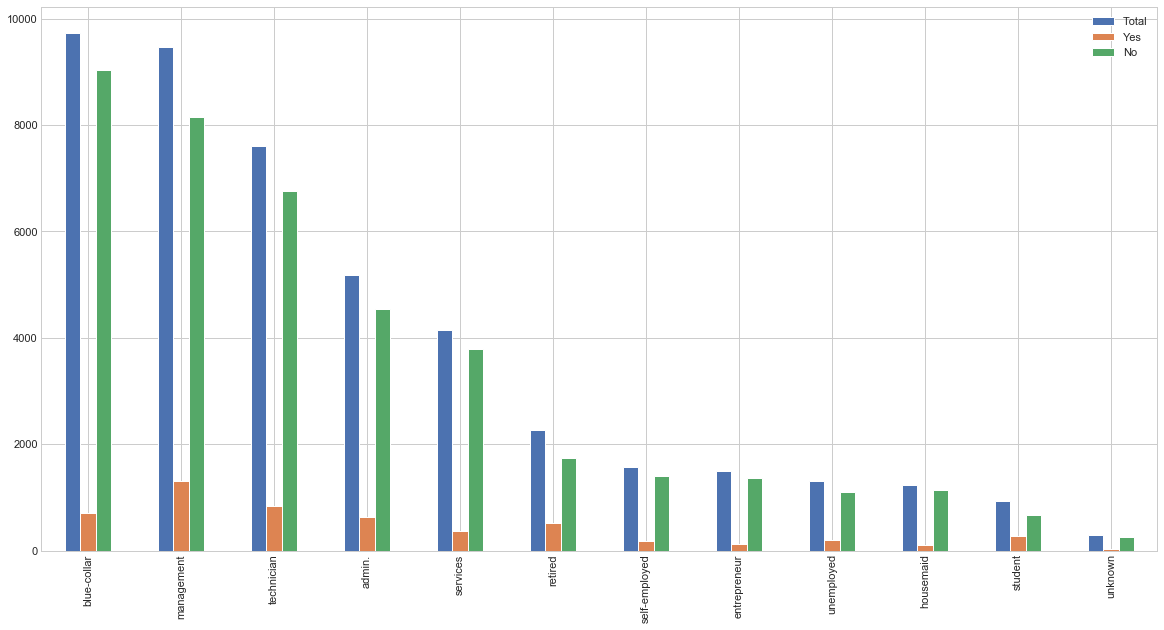

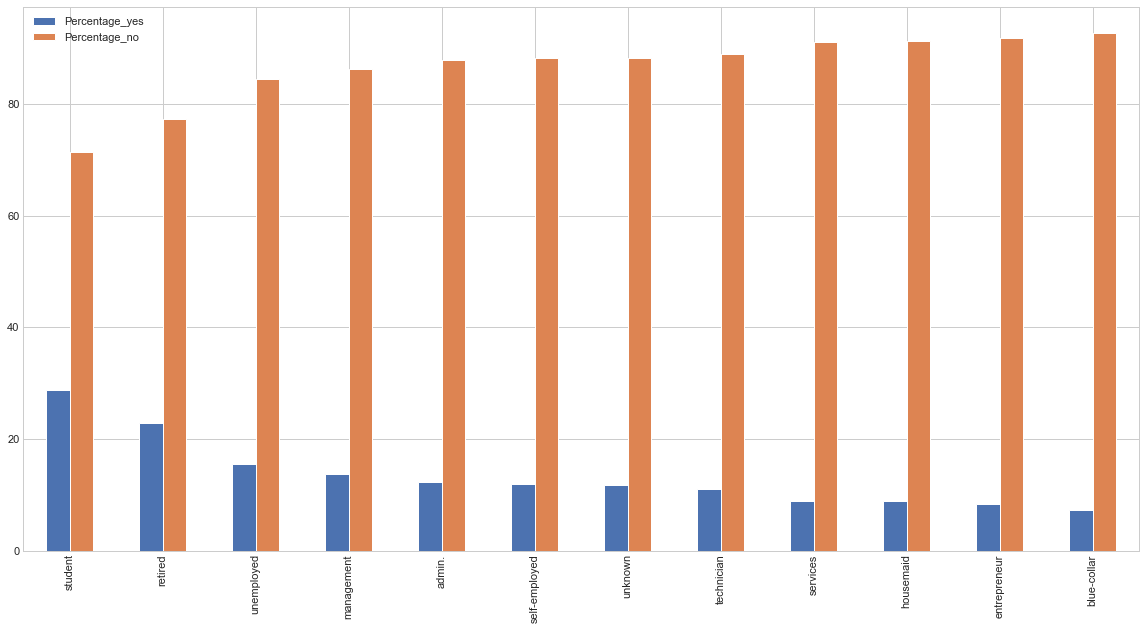

In [41]:
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,10))
plt.xticks(positions, labels)

labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,10))
plt.xticks(positions, labels)

<B><U>MARITAL</B></U>

Index(['married', 'single', 'divorced'], dtype='object')



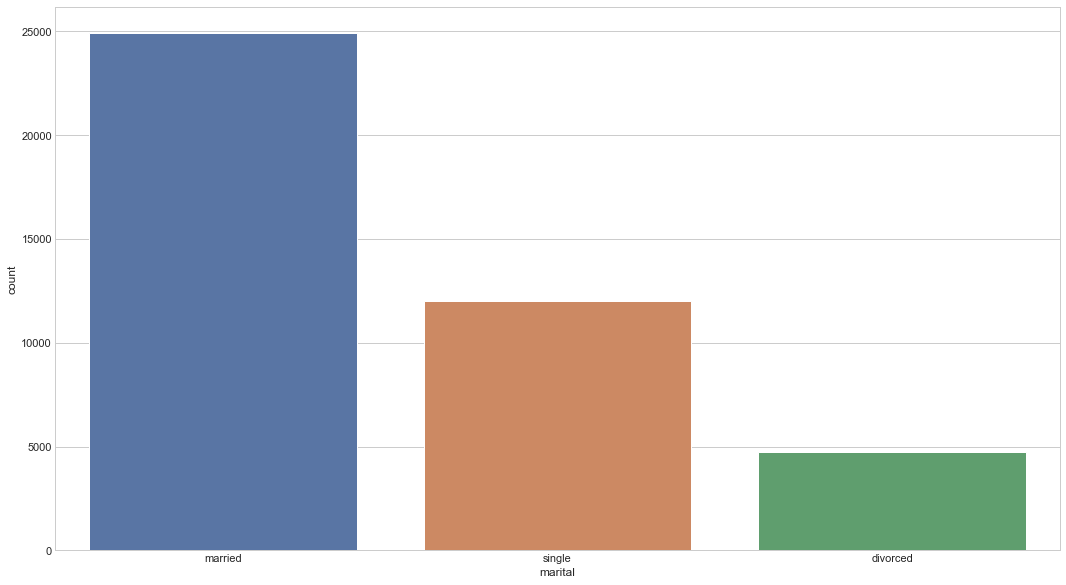

In [42]:
print(df['marital'].value_counts().index)
print()
plt.figure(figsize = (18,10))
sns.countplot(df['marital'])

In [43]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df['marital'].value_counts().index:
  df_marital=pd.DataFrame()
  df_marital=df[df['marital']==i]
  title.append(i)
  total_count_in_each_group.append(df_marital.shape[0])
  yes_count.append(df_marital[df_marital['Target']=='yes'].count()['Target'])
  no_count.append(df_marital[df_marital['Target']=='no'].count()['Target'])
df_marital=pd.DataFrame()
df_marital['Status']=title
df_marital['Total']=total_count_in_each_group
df_marital['Yes']=yes_count
df_marital['No']=no_count
df_marital

Status  Total   Yes     No
0   married  24939  2583  22356
1    single  12018  1842  10176
2  divorced   4740   572   4168

In [44]:

df_marital_final=pd.DataFrame()
df_marital_final['Status']=title
df_marital_final['Percentage_yes']=(df_marital['Yes']/df_marital['Total'])*100
df_marital_final['Percentage_no']=(df_marital['No']/df_marital['Total'])*100
df_marital_final=df_marital_final.sort_values('Percentage_yes',ascending=False)
df_marital_final.round(2)

Status  Percentage_yes  Percentage_no
1    single           15.33          84.67
2  divorced           12.07          87.93
0   married           10.36          89.64

([<matplotlib.axis.XTick at 0x202cd74a188>,
 <a list of 3 Text xticklabel objects>)

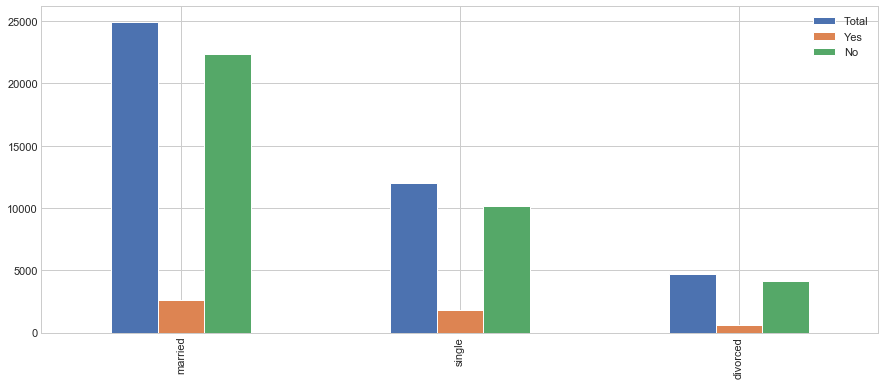

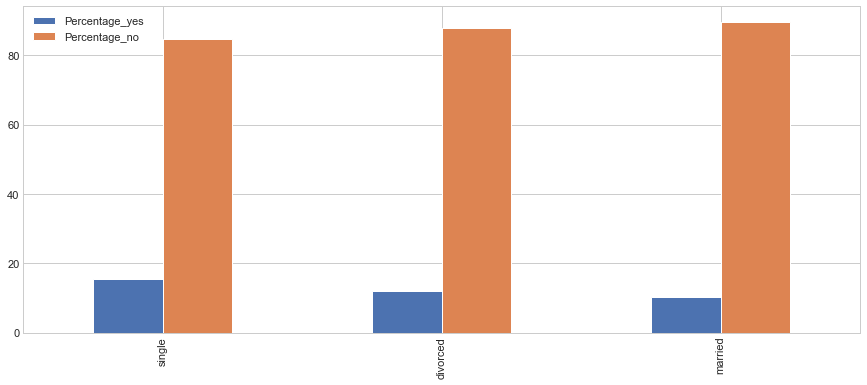

In [45]:
labels=df_marital['Status']
positions = np.arange(0,3,1)
df_marital.plot(kind='bar',figsize=(15,6))
plt.xticks(positions, labels)

labels=df_marital_final['Status'].tolist()
position=df_marital_final['Status'].index
df_marital_final.plot(kind='bar',figsize=(15,6))
plt.xticks(positions, labels)

<B><U>EDUCATION</B></U>

Index(['secondary', 'tertiary', 'primary', 'unknown'], dtype='object')



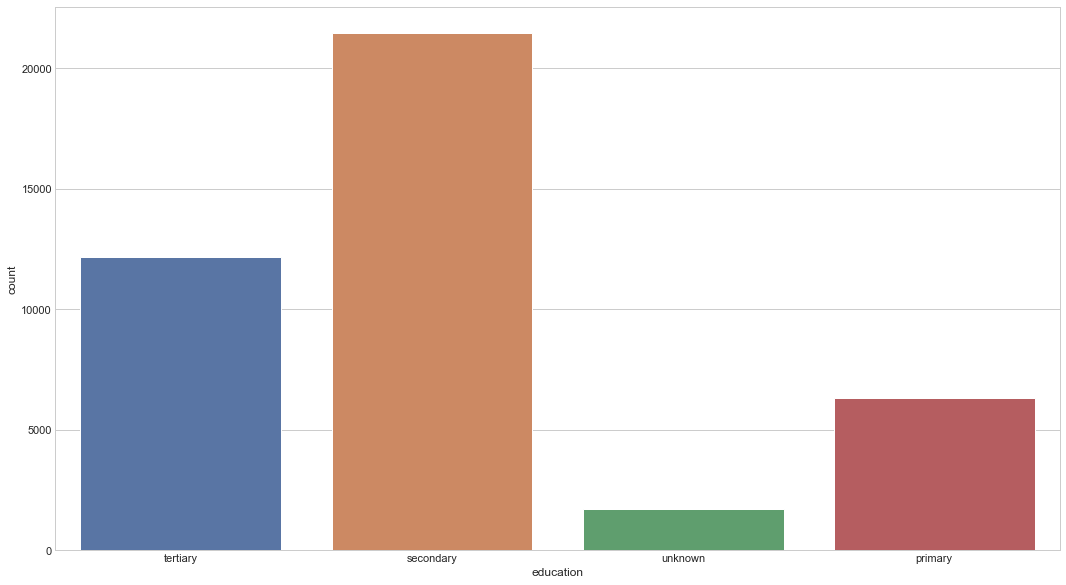

In [46]:
print(df['education'].value_counts().index)
print()
plt.figure(figsize = (18,10))
sns.countplot(df['education'])

In [47]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df['education'].value_counts().index:
  df_education=pd.DataFrame()
  df_education=df[df['education']==i]
  title.append(i)
  total_count_in_each_group.append(df_education.shape[0])
  yes_count.append(df_education[df_education['Target']=='yes'].count()['Target'])
  no_count.append(df_education[df_education['Target']=='no'].count()['Target'])
df_education=pd.DataFrame()
df_education['Level']=title
df_education['Total']=total_count_in_each_group
df_education['Yes']=yes_count
df_education['No']=no_count
df_education

Level  Total   Yes     No
0  secondary  21482  2314  19168
1   tertiary  12175  1870  10305
2    primary   6314   566   5748
3    unknown   1726   247   1479

In [48]:
df_education_final=pd.DataFrame()
df_education_final['Level']=title
df_education_final['Percentage_yes']=(df_education['Yes']/df_education['Total'])*100
df_education_final['Percentage_no']=(df_education['No']/df_education['Total'])*100
df_education_final=df_education_final.sort_values('Percentage_yes',ascending=False)
df_education_final.round(2)

Level  Percentage_yes  Percentage_no
1   tertiary           15.36          84.64
3    unknown           14.31          85.69
0  secondary           10.77          89.23
2    primary            8.96          91.04

([<matplotlib.axis.XTick at 0x202cf9ef388>,
 <a list of 3 Text xticklabel objects>)

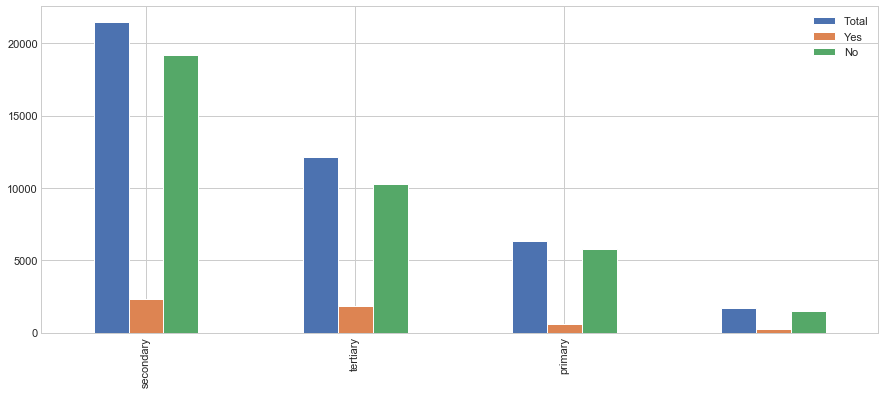

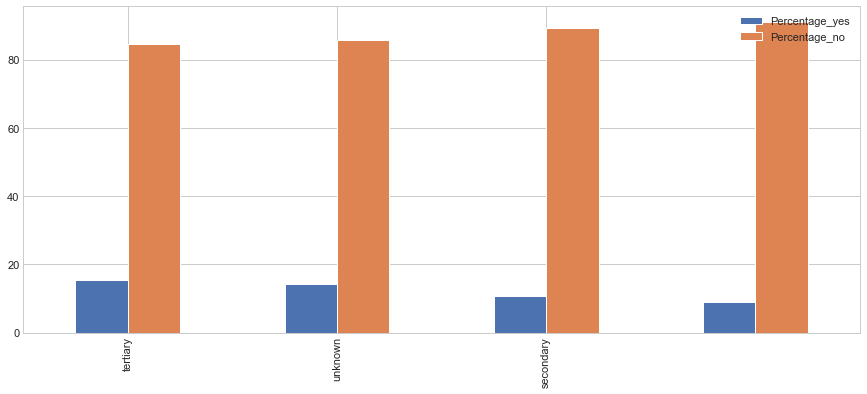

In [49]:
labels=df_education['Level']
positions = np.arange(0,3,1)
df_education.plot(kind='bar',figsize=(15,6))
plt.xticks(positions, labels)

labels=df_education_final['Level'].tolist()
position=df_education_final['Level'].index
df_education_final.plot(kind='bar',figsize=(15,6))
plt.xticks(positions, labels)

<B><U>POUTCOME</B></U>
 outcome of the previous marketing campaign

Index(['unknown', 'failure', 'other', 'success'], dtype='object')



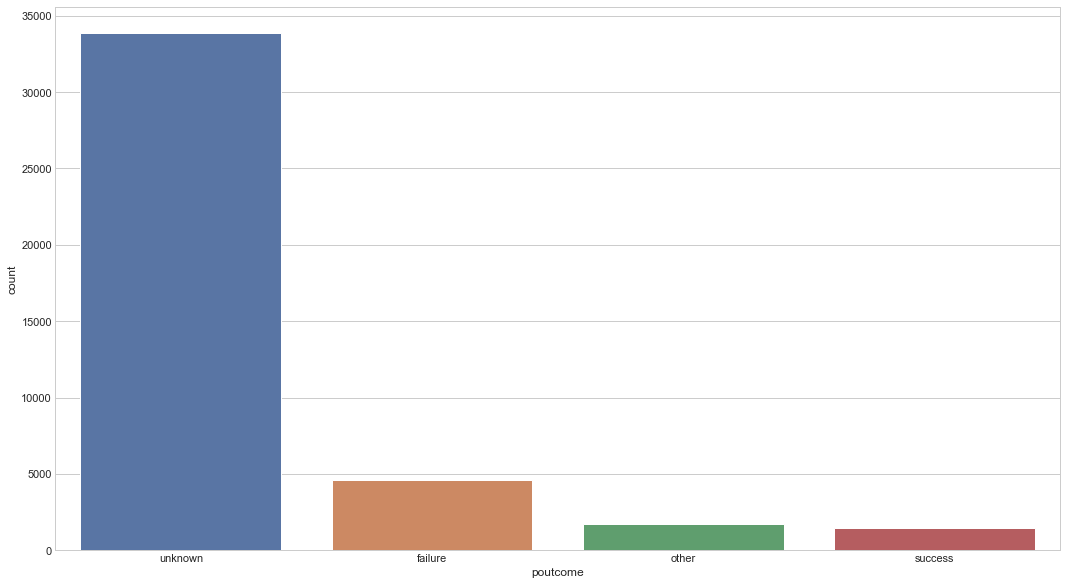

In [50]:
print(df['poutcome'].value_counts().index)
print()
plt.figure(figsize = (18,10))
sns.countplot(df['poutcome'])

In [51]:
success=df[(df['poutcome']=='success')].count()['poutcome']
failure=df[(df['poutcome']=='failure')].count()['poutcome']
unknown=df[(df['poutcome']=='unknown')].count()['poutcome']
other=df[(df['poutcome']=='other')].count()['poutcome']

previous_campaign=pd.DataFrame({'Status':['Success','Failure','Unknown','Others'],
                                "Values":[success,failure,unknown,other]})
previous_campaign['Percentage']=(previous_campaign['Values']/45211)*100
previous_campaign

Status  Values  Percentage
0  Success    1445    3.196125
1  Failure    4628   10.236447
2  Unknown   33894   74.968481
3   Others    1730    3.826502

([<matplotlib.axis.XTick at 0x202cfaeb888>,
 <a list of 3 Text xticklabel objects>)

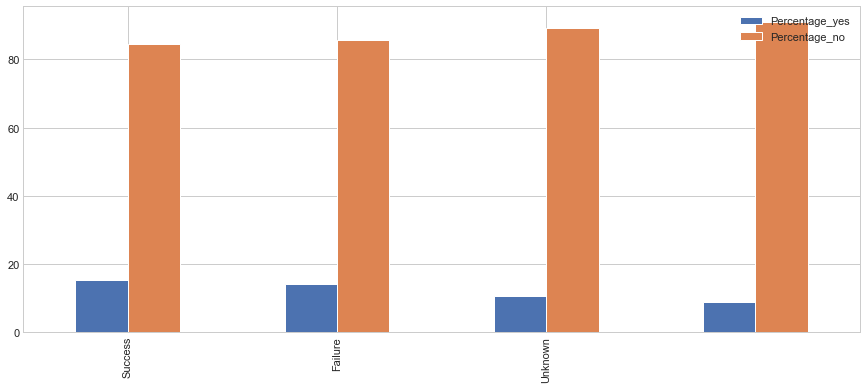

In [52]:
labels=previous_campaign['Status'].tolist()
position=previous_campaign['Status'].index
df_education_final.plot(kind='bar',figsize=(15,6))
plt.xticks(positions, labels)

In [53]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

#### Credit and target

### Additional Multivariate analysis

Total Count 41697
1.6763795956543637
98.32362040434563


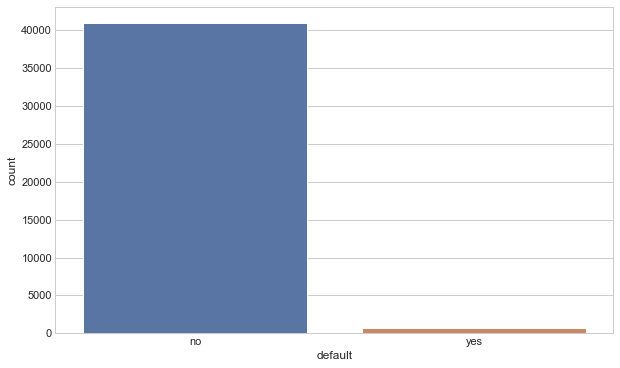

In [54]:
plt.figure(figsize = (10,6))
default_yes=df[df['default']=='yes']
default_no=df[df['default']=='no']
total=df.shape[0]
yes=default_yes.count()['Target']
no=default_no.count()['Target']
sns.countplot(df['default'])
print("Total Count",total)
print((yes/total)*100)
print((no/total*100))

In [55]:
yes=default_yes[default_yes['Target']=='yes'].count()['Target']
no=default_yes[default_yes['Target']=='no'].count()['Target']
total=default_yes.count()['Target']
print("Default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Default
699
6.437768240343347
93.56223175965665


In [56]:
yes=default_no[default_no['Target']=='yes'].count()['Target']
no=default_no[default_no['Target']=='no'].count()['Target']
total=default_no.count()['Target']
print("Non default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Non default
40998
12.078637982340602
87.9213620176594


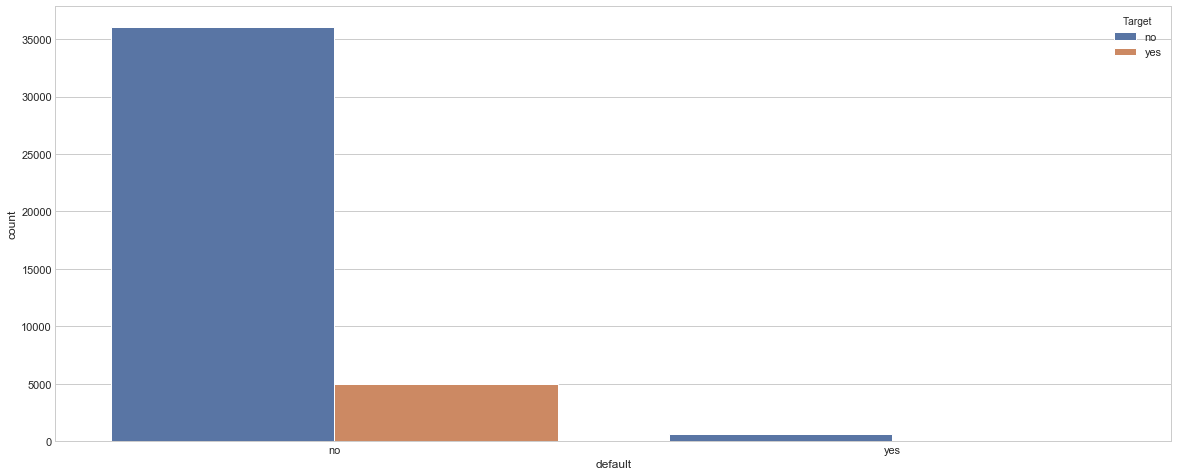

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(df['default'],hue=df['Target'])

####  Loan and Target

Total counts
We have  56.291819555363695  % who have house loan and count is  23472
We have  43.708180444636305  % who have dont house loan and count is  18225


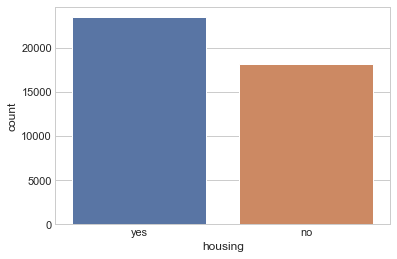

In [58]:
default_yes=df[df['housing']=='yes']
default_no=df[df['housing']=='no']

total=df.shape[0]
yes=default_yes.count()['Target']
no=default_no.count()['Target']
sns.countplot(df['housing'])

print("Total counts")
print("We have ",(yes/total)*100," % who have house loan and count is ", yes)
print("We have ",(no/total)*100," % who have dont house loan and count is ",no)

In [59]:
yes=default_yes[default_yes['Target']=='yes'].count()['Target']
no=default_yes[default_yes['Target']=='no'].count()['Target']
total=default_yes.count()['Target']
print("Total that have housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total that have housing loan are 23472
Out of the total 7.753919563735515  % have subscribed to Term Deposit Plan
Out of the total 92.24608043626449  % have not subscribed to Term Deposit Plan


In [60]:
yes=default_no[default_no['Target']=='yes'].count()['Target']
no=default_no[default_no['Target']=='no'].count()['Target']
total=default_no.count()['Target']
print("Total number of people that don't housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total number of people that don't housing loan are 18225
Out of the total 17.432098765432098  % have subscribed to Term Deposit Plan
Out of the total 82.5679012345679  % have not subscribed to Term Deposit Plan


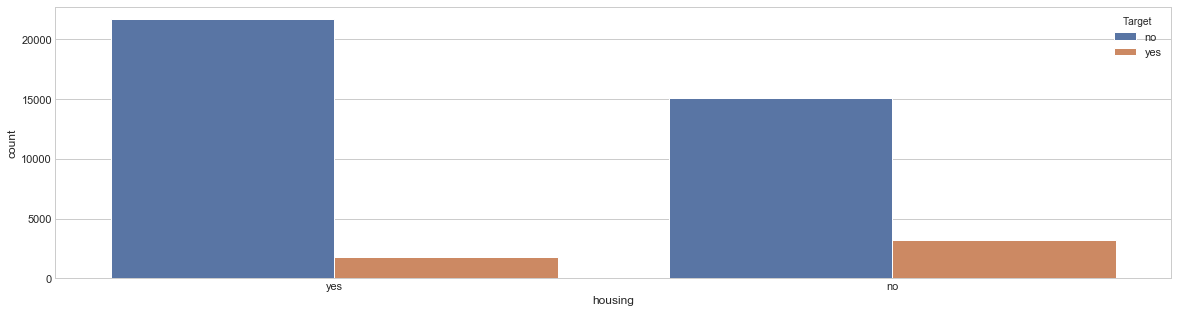

In [61]:
plt.figure(figsize=(20,5))
sns.countplot(df['housing'],hue=df['Target'])

In [62]:
df['month'].value_counts()

may    12946
jul     6123
aug     5578
jun     4930
nov     3655
apr     2779
feb     2489
jan     1324
oct      681
sep      537
mar      451
dec      204
Name: month, dtype: int64

In [63]:
df.loc[df['month']=='jan','month']=1
df.loc[df['month']=='feb','month']=2
df.loc[df['month']=='mar','month']=3
df.loc[df['month']=='apr','month']=4
df.loc[df['month']=='may','month']=5
df.loc[df['month']=='jun','month']=6
df.loc[df['month']=='jul','month']=7
df.loc[df['month']=='aug','month']=8
df.loc[df['month']=='sep','month']=9
df.loc[df['month']=='oct','month']=10
df.loc[df['month']=='nov','month']=11
df.loc[df['month']=='dec','month']=12

In [64]:
dict1=dict(list(df.groupby(['month','Target'])))
list1=[1,2,3,4,5,6,7,8,9,10,11,12]
no=[]
yes=[]
months=[]
for i in list1:
  months.append(i)
  for j in ['no','yes']:
    if(j=='no'):
      no.append(dict1[i,j].count()['Target'])
    else:
      yes.append(dict1[i,j].count()['Target'])

total_count_per_month=[]
dict2=dict(list(df.groupby(['month'])))
for i in list1:
  total_count_per_month.append(dict2[i].count()['Target'])

      
print(months)
print(total_count_per_month)
print(yes)
print(no)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1324, 2489, 451, 2779, 12946, 4930, 6123, 5578, 537, 681, 3655, 204]
[134, 416, 237, 543, 885, 523, 576, 648, 252, 305, 380, 98]
[1190, 2073, 214, 2236, 12061, 4407, 5547, 4930, 285, 376, 3275, 106]


In [65]:
month_wise=pd.DataFrame()
month_wise['Months']=months
month_wise['Total ENteries per month']=total_count_per_month
month_wise['Count of Subscribed']=yes
month_wise['Count of Not Sub']=no
month_wise['Subscription Rate']=(month_wise['Count of Subscribed']/month_wise['Total ENteries per month'])*100
month_wise['Not Sub Rate']=(month_wise['Count of Not Sub']/month_wise['Total ENteries per month'])*100

In [66]:
month_wise=month_wise.sort_values("Subscription Rate",ascending=False)
month_wise

Months  Total ENteries per month  Count of Subscribed  Count of Not Sub  \
2        3                       451                  237               214   
11      12                       204                   98               106   
8        9                       537                  252               285   
9       10                       681                  305               376   
3        4                      2779                  543              2236   
1        2                      2489                  416              2073   
7        8                      5578                  648              4930   
5        6                      4930                  523              4407   
10      11                      3655                  380              3275   
0        1                      1324                  134              1190   
6        7                      6123                  576              5547   
4        5                     12946                  885             12061   

    Subscription Rate  Not Sub Rate  
2           52.549889     47.450111  
11          48.039216     51.960784  
8           46.927374     53.072626  
9           44.787078     55.212922  
3           19.539403     80.460597  
1           16.713540     83.286460  
7           11.617067     88.382933  
5           10.608519     89.391481  
10          10.396717     89.603283  
0           10.120846     89.879154  
6            9.407153     90.592847  
4            6.836088     93.163912

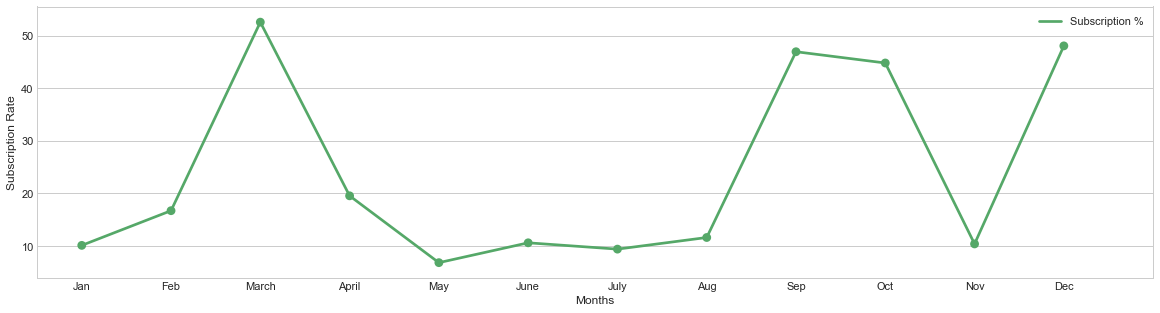

In [67]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Subscription Rate'],color='g')
plt.xticks(position,labels)
plt.legend(['Subscription %'])

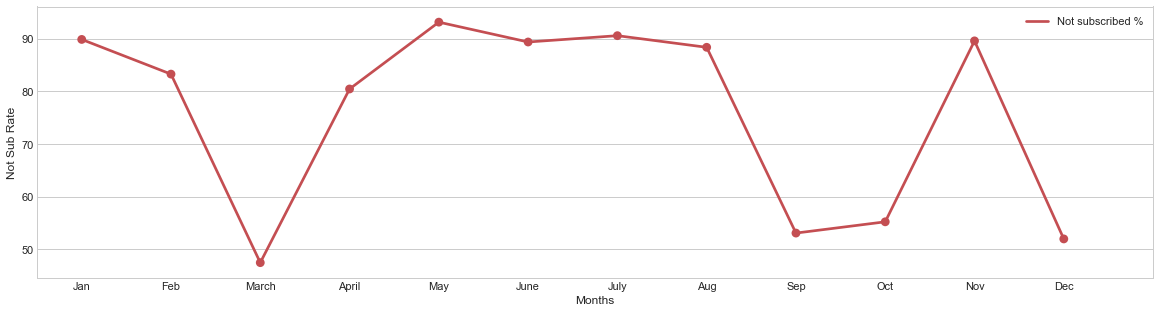

In [68]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Not Sub Rate'],color='r')
plt.xticks(position,labels)
plt.legend(['Not subscribed %'])

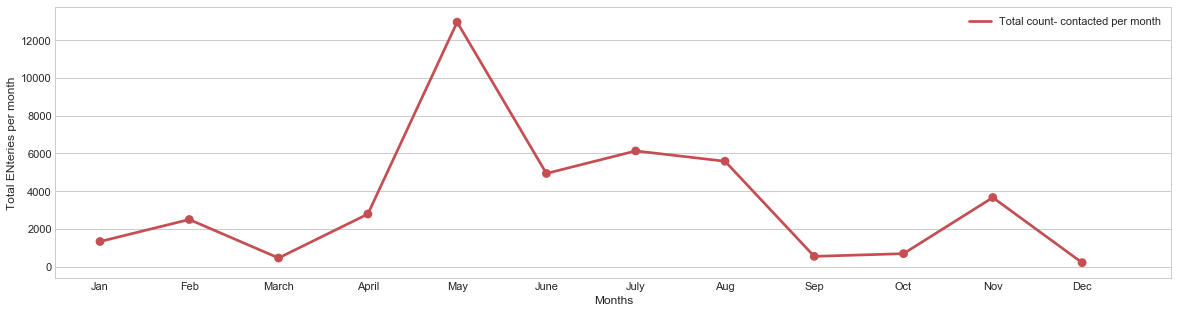

In [69]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Total ENteries per month'],color='r')
plt.xticks(position,labels)
plt.legend(['Total count- contacted per month'])

In [70]:
month_final=month_wise[['Months','Subscription Rate','Not Sub Rate']]
month_final=month_final.set_index('Months')

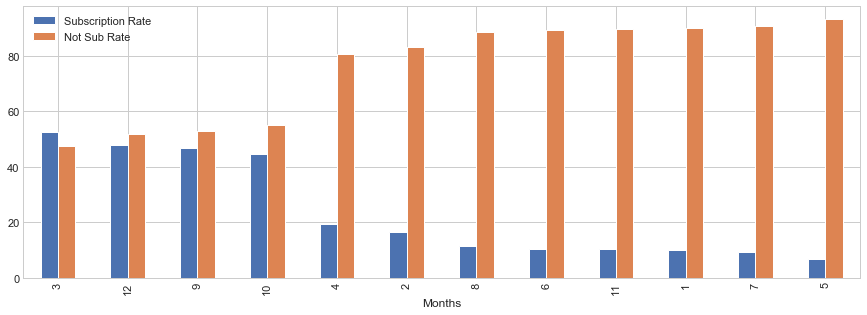

In [71]:
month_final.plot(kind='bar',figsize=(15,5))

In [72]:
conda install -c plotly plotly

Solving environment: ...working... 
  - anaconda/win-64::conda-4.8.3-py37_0
  - defaults/win-64::conda-4.8.3-py37_0done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### CAll Duration

In [73]:
total=[]
no=[]
yes=[]

total.append(df[(df['duration']<=500)].count()['duration'])
no.append(df[(df['duration']<=500) & (df['Target']=='no')].count()['Target'])
yes.append(df[(df['duration']<=500) & (df['Target']=='yes')].count()['Target'])


total.append(df[(df['duration']<=1000) & (df['duration']>500)].count()['duration'])
no.append(df[(df['duration']<=1000) & (df['duration']>500) & (df['Target']=='no')].count()['Target'])
yes.append(df[(df['duration']<=1000) & (df['duration']>500) & (df['Target']=='yes')].count()['Target'])

total.append(df[(df['duration']<=1500) & (df['duration']>1000)].count()['duration'])
no.append(df[(df['duration']<=1500) & (df['duration']>1000) & (df['Target']=='no')].count()['Target'])
yes.append(df[(df['duration']<=1500) & (df['duration']>1000) & (df['Target']=='yes')].count()['Target'])

total.append(df[(df['duration']<=2000) & (df['duration']>1500)].count()['duration'])
no.append(df[(df['duration']<=2000) & (df['duration']>1500) & (df['Target']=='no')].count()['Target'])
yes.append(df[(df['duration']<=2000) & (df['duration']>1500) & (df['Target']=='yes')].count()['Target'])

total.append(df[(df['duration']>2000)].count()['duration'])
no.append(df[(df['duration']>2000) & (df['Target']=='no')].count()['Target'])
yes.append(df[(df['duration']>2000) & (df['Target']=='yes')].count()['Target'])


duration=pd.DataFrame()
duration['Duration']=['Till 500','501-1000','1001-1500','1501-2000','2001+']
duration['total']=total
duration['Yes']=yes
duration['No']=no
duration['Yes percent']=(duration['Yes']/duration['total'])*100
duration.sort_values('Yes percent',ascending=False)

Duration  total   Yes     No  Yes percent
3  1501-2000    155   100     55    64.516129
2  1001-1500    771   459    312    59.533074
4      2001+     58    30     28    51.724138
1   501-1000   3984  1542   2442    38.704819
0   Till 500  36729  2866  33863     7.803098

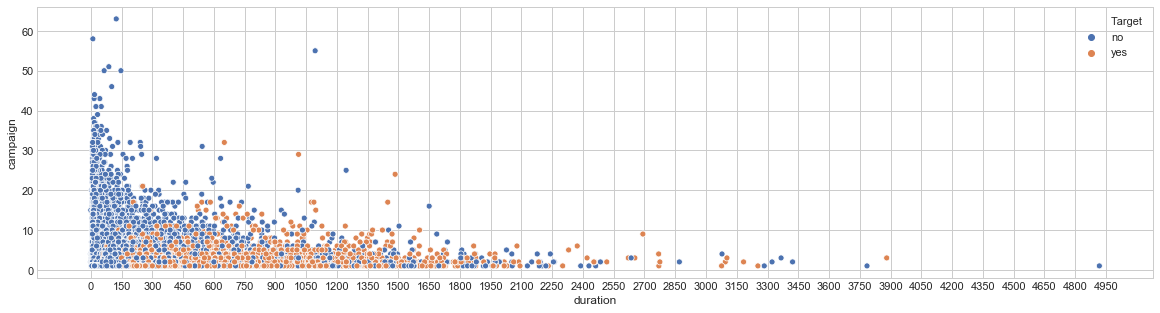

In [74]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,5000,150))
sns.scatterplot(df['duration'],df['campaign'],hue=df['Target'])

### Campaign

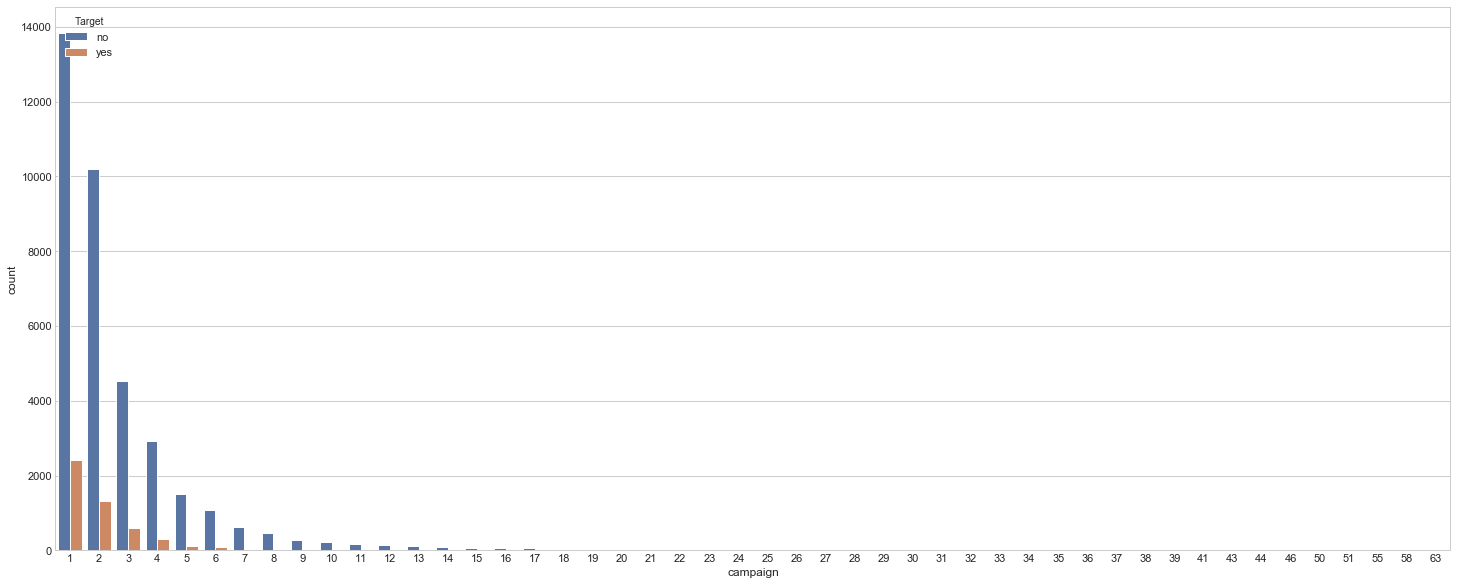

In [75]:
plt.figure(figsize=(25,10))
sns.countplot(df['campaign'],hue=df['Target'])

In [76]:
df_15=df[(df['campaign']<=15) ]
df_30=df[(df['campaign']>=16) & (df['campaign']<=30) ]
df_31=df[(df['campaign']>=31) ]

In [77]:
total_calls=[]
yes=[]
no=[]
for i in[df_15,df_30,df_31]:
  total_calls.append(i.count()['campaign'])
  yes.append(i[i['Target']=='yes'].count()['Target'])
  no.append(i[i['Target']=='no'].count()['Target'])

print(total_calls)
print(yes)
print(no)

[41237, 410, 50]
[4985, 11, 1]
[36252, 399, 49]


In [78]:
campaigns=pd.DataFrame()
campaigns['No.of call']=['Till 15','16- 30','30+ more']
campaigns['Total no of Calls']=total_calls
campaigns['Took Subscription']=yes
campaigns['No Subscription']=no
campaigns['Rate of Sub']=(campaigns['Took Subscription']/campaigns['Total no of Calls'])*100

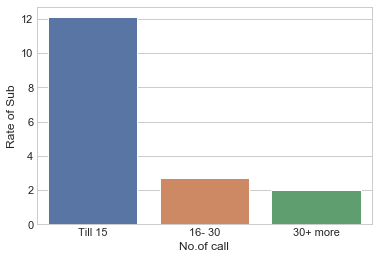

In [79]:
sns.barplot(campaigns['No.of call'],campaigns['Rate of Sub'])


### MArginal Note 
1)Calling between 1-15 has a good subscription rate as compared to calling more than 15 times

2)59 Customers we called more than 30 times,out of which only 1 client took the subscription

In [80]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## TARGET (y) Examination

### Combined Analysis

In [81]:
df['Target'].value_counts()

no     36700
yes     4997
Name: Target, dtype: int64

In [82]:
df['Target'].value_counts(normalize=True)*100

no     88.015924
yes    11.984076
Name: Target, dtype: float64

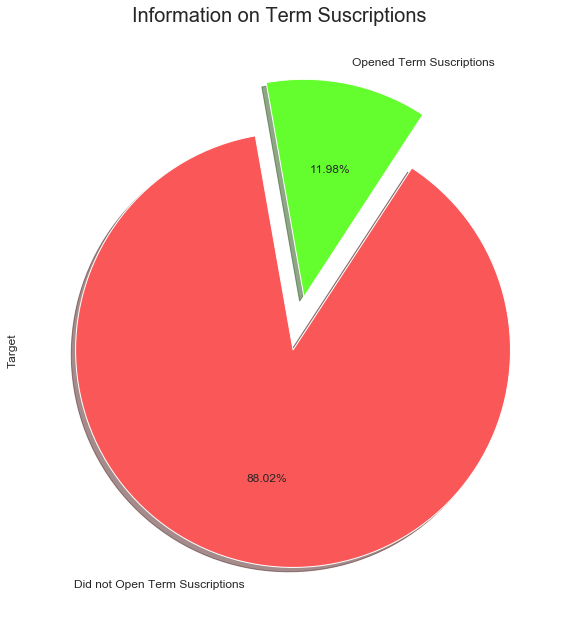

In [83]:
colors = ["#FA5858", "#64FE2E"]

labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)
df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', figsize=(15, 10),shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=100)
#ax.set_ylabel('% of Condition of Loans', fontsize=14)

plt.show()

In [84]:
df.groupby('Target').mean().round(2)

age  balance    day  duration  campaign  pdays  previous
Target                                                            
no      40.75  1418.17  15.85    221.57      2.82  37.59      0.52
yes     41.56  1909.70  15.12    535.34      2.13  69.20      1.18

## Comment 3 on output Target
<b>From this data we can see that aproximatelly 88% customers did not subscribed for Term deposit.Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 88:12. 

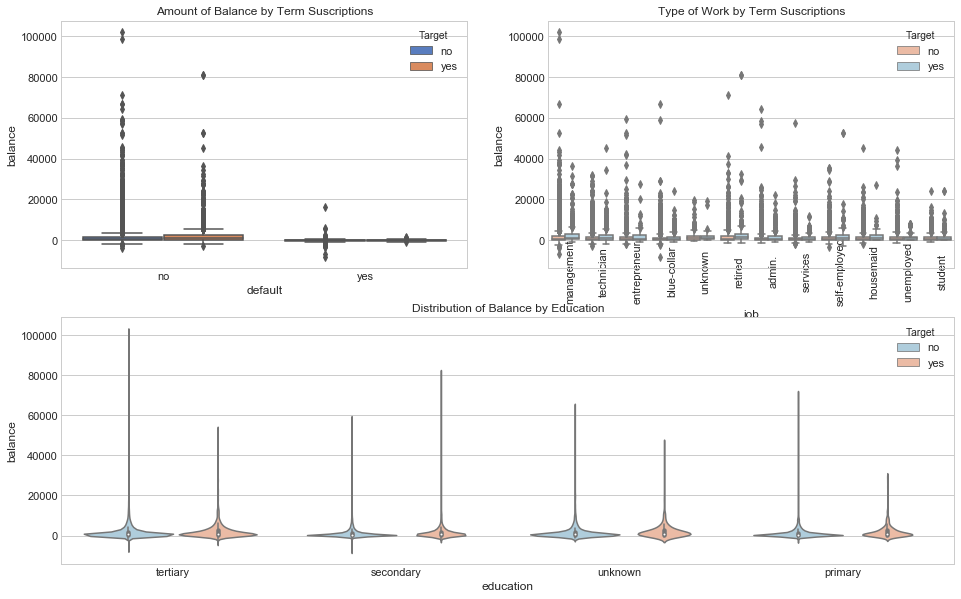

In [85]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="Target",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="Target",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="Target", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

## Analysis regarding occupations
<b> Occupation:</b> Management is the occupation that is more prevalent in this dataset.<br>
<b>Age </b> As expected, the retired are the ones who have the highest median age while student are the lowest.<br>
<b>Balance </b> Management and Retirees are the ones who have the highest balance in their accounts<br>

In [86]:
# In this step it is essentially to exclude by dropping the Job Occupations that are "Unknown"
df= df.drop(df.loc[df["job"] == "unknown"].index)

# Furthermore as admin and management are basically the same we will be puttint them  under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [87]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["Target"] == "yes"]
occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']
traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(size=2,),
            line=dict(width=1),
        ))
layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True, showgrid=True, zeroline=True, dtick=5, gridcolor='rgb(255, 255, 255)', gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2,),
    margin=dict(l=40, r=30, b=80, t=100,),
    paper_bgcolor='rgb(300,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [88]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(x=labels,y=vals, marker=dict(color="red"))]
layout = go.Layout(title="Count by Marital Status",)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

### Clustering Marital Status and Education:
Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.
Education: The level of education also has a significant impact on the amount of balance a prospect has.
Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [89]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

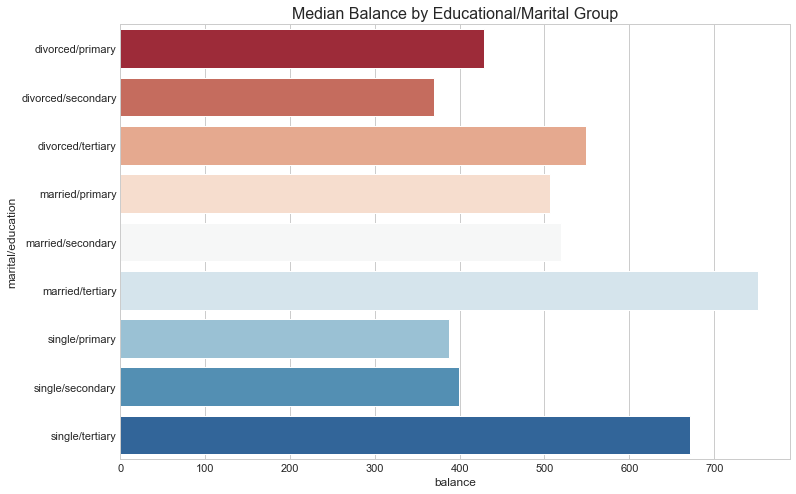

In [90]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [91]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

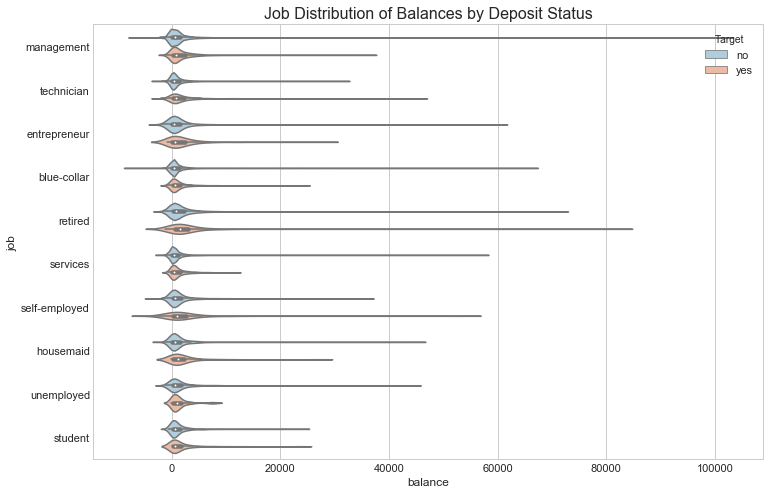

In [92]:
fig = plt.figure(figsize=(12,8))
sns.violinplot(x="balance", y="job", hue="Target", palette="RdBu_r",data=df);
plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)
plt.show()

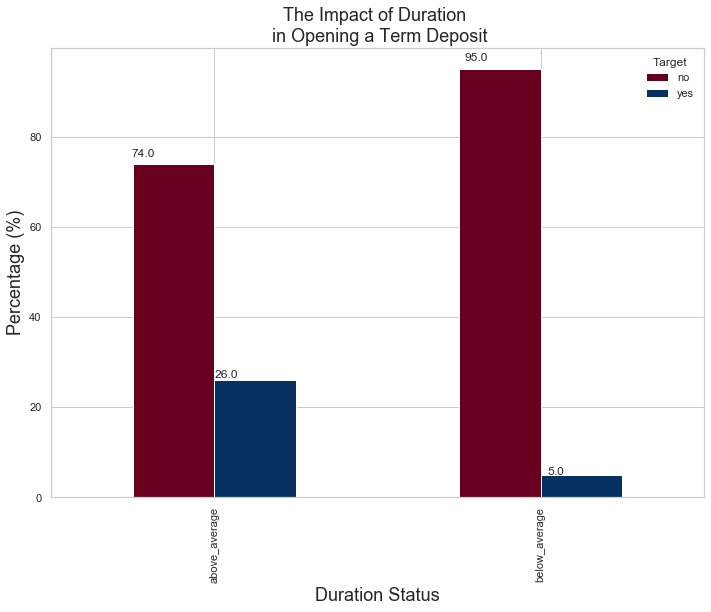

In [93]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['Target']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [94]:
df.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5     5       261         1     -1         0  unknown     no   
1  unknown    5     5       151         1     -1         0  unknown     no   
2  unknown    5     5        76         1     -1         0  unknown     no   
3  unknown    5     5        92         1     -1         0  unknown     no   
5  unknown    5     5       139         1     -1         0  unknown     no   

   marital/education duration_status  
0   married/tertiary   above_average  
1   single/secondary   below_average  
2  married/secondary   below_average  
3                NaN   below_average  
5   married/tertiary   below_average

In [95]:
df.drop(['marital/education'], axis=1, inplace=True)

In [97]:
df.drop(['duration_status'], axis=1, inplace=True)

In [98]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5     5       261         1     -1         0  unknown     no  
1  unknown    5     5       151         1     -1         0  unknown     no  
2  unknown    5     5        76         1     -1         0  unknown     no  
3  unknown    5     5        92         1     -1         0  unknown     no  
5  unknown    5     5       139         1     -1         0  unknown     no

In [99]:
df['Target'] = df['Target'].replace({'yes':1, 'no':0})

In [100]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown    5     5       261         1     -1         0  unknown       0  
1  unknown    5     5       151         1     -1         0  unknown       0  
2  unknown    5     5        76         1     -1         0  unknown       0  
3  unknown    5     5        92         1     -1         0  unknown       0  
5  unknown    5     5       139         1     -1         0  unknown       0

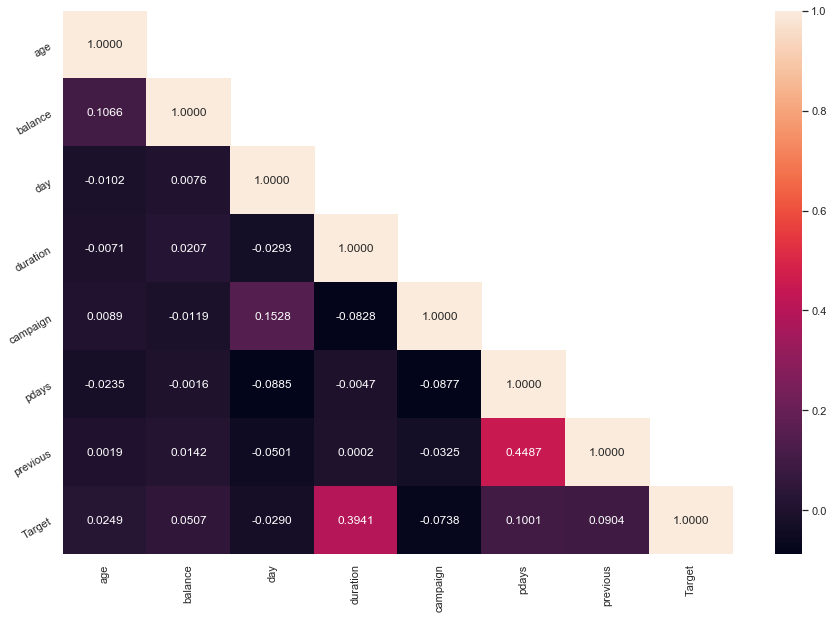

In [101]:
# See the correlation in graphical representation
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,10))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.4f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Comments 2: on Categorical Variables & Bivariate Analysis 
<li type="square">From above graphs we can see that students and retired people are the clients who have high percentage of of subscription rate.<br>
<li type="square">Blue-collar,entrepreneur,housemaid,services have low are few jobs that have low subscription rate.<br>
<li type="square">People with job description as 'Blue-collar' are the most contacted people<br>
<li type="square">Students are the less contacted people<br>
<li type="square">We have 288 enteries where job is unknown.<br>


    

Drop the Job Occupations that are "Unknown" also Admin and management are basically the same let's put it under the same categorical value
    
<li type="square">The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.</li><br> 
<li type="square">Poutcome 81% of values are Unknown value in poutcome column This column can be dropped.
<li type="square">Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.</li><br>

<li type="square">Columns 'education' and 'y' don't show strong relstionship. There is also 1857 entries where education is unknown.
<li type="square">As per the visualization, 'Marital' and Target don't have a strong relationship
<li type="square">81% of values are Unknown value in poutcome column.
<li type="square">1.8% has default in credit
<li type="square">98.1% are those who are non default in their credit
<li type="square">From the people who have default in credits,out of that 6% have subscripted to Term Deposit plan
<li type="square">From the people who have non default on credit, out of that 11% of the clients have subscribed to Term Deposit plan
<li type="square">More clients with Non Default on credit are subscripted to Term Deposit Plan
    
<li type="square">'Previous' also seems to have a correlation to y but not really a high correlation though.
    
<li type="square">'Month' might be a good predictor of the outcome variable.
    
<li type="square">There are more clients who don't have a housing loan and have subscribed to Term Deposit Plan.

<li type="square">We have 44.41% of people who don't have housing loan and out of that 16.70% people have subscribed to Term Deposit plan

<li type="square">We can see March Month has highest subscription rate followed by december and September.
Many people were contacted in the month of May but May month marks the lowest subscription rate<br>
    

<li type="square">Call Duration<br>
    
We have 39840 who have call duration less than 500 seconds.

Where the call duration is less(0-500seconds),we have very few clients subscribing.

Where the call duration is between 1500- 2000 seconds that is 15-30 mins we can see more number of clients subscribing to Term Deposit plan

We have 59 calls where the call duration is more than 2000 seconds<br>

<li type="square">Calling between 1-15 has a good subscription rate as compared to calling more than 15 times Also 59 Customers we called more than 30 times,out of which only 1 client took the subscription
    
<li type="square"><b>Marital Status</b><br>
This analysis didn't specify any significant results other than most <b>divorced individuals</b> are . <br>
This is not strage since they have obviously split their financial possessing <br>
Nevertheless, since no further observations have been found we will proceed to clustering marital status with education status.<br> 
    
<li type="square"><b>Campaign Duration:</b>We saw that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
<b>Average Campaign Duration:</b> The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.
<b>Duration Status:</b> People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.
    
<li type="square"><b>from the heatmap</b>, the <b>'duration'</b> seems to have a high correlation on y. means it highly affects the decision to either subscribe or not


## Suggestion for the Next Marketing Campaign Strategy:<br>

1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of **May**. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of **March, September, October and December.** (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)<br><br>
2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of **fall** and **winter**. The next marketing campaign should focus its activity throghout these seasons. <br><br>
3) **Campaign Calls:** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. <br><br>
4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions. <br><br>
5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.<br><br>
6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. <br><br>

7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute. <br><br>

8) <b>Target individuals with a higher duration (above 375): </b> Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.<br><br>

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.


## D2: Deliverable – 2 (Prepare the data for analytics) 

In [102]:
# printing the unique data label list for column- job,education,month,poutcome,housing,default,Target
print(df.job.value_counts())
print(df.education.value_counts())
print(df.month.value_counts())
print(df.housing.value_counts())
print(df.default.value_counts())
print(df.Target.value_counts())

management       13422
blue-collar       9116
technician        6990
services          3845
retired           2100
self-employed     1455
entrepreneur      1333
unemployed        1196
housemaid         1088
student            892
Name: job, dtype: int64
secondary    21416
tertiary     12143
primary       6268
unknown       1610
Name: education, dtype: int64
5     12917
7      6095
8      5521
6      4852
11     3641
4      2773
2      2476
1      1310
10      670
9       530
3       449
12      203
Name: month, dtype: int64
yes    23448
no     17989
Name: housing, dtype: int64
no     40740
yes      697
Name: default, dtype: int64
0    36470
1     4967
Name: Target, dtype: int64


In [103]:
replaceStruct = {"education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                "poutcome":     {"failure": 1, "other": 2 ,"success": 3 ,"unknown": -1},
                "housing":  {"no": 0, "yes": 1 },
                "default": {"no": 0, "yes": 1 }}

In [104]:
# Selected columns will be hot encoded as we don't want to assign integers like 1,2,3,4 
#to the unique values to avoid bias
oneHotCols=["marital","loan","contact","job","month"]

In [105]:
df1=df.replace(replaceStruct)
df2=pd.get_dummies(df1, columns=oneHotCols)
df2

age  education  default  balance  housing  day  duration  campaign  \
0       58          3        0     2143        1    5       261         1   
1       44          2        0       29        1    5       151         1   
2       33          2        0        2        1    5        76         1   
3       47         -1        0     1506        1    5        92         1   
5       35          3        0      231        1    5       139         1   
...    ...        ...      ...      ...      ...  ...       ...       ...   
45206   51          3        0      825        0   17       977         3   
45207   71          1        0     1729        0   17       456         2   
45208   72          2        0     5715        0   17      1127         5   
45209   57          2        0      668        0   17       508         4   
45210   37          2        0     2971        0   17       361         2   

       pdays  previous  ...  month_3  month_4  month_5  month_6  month_7  \
0         -1         0  ...        0        0        1        0        0   
1         -1         0  ...        0        0        1        0        0   
2         -1         0  ...        0        0        1        0        0   
3         -1         0  ...        0        0        1        0        0   
5         -1         0  ...        0        0        1        0        0   
...      ...       ...  ...      ...      ...      ...      ...      ...   
45206     -1         0  ...        0        0        0        0        0   
45207     -1         0  ...        0        0        0        0        0   
45208    184         3  ...        0        0        0        0        0   
45209     -1         0  ...        0        0        0        0        0   
45210    188        11  ...        0        0        0        0        0   

       month_8  month_9  month_10  month_11  month_12  
0            0        0         0         0         0  
1            0        0         0         0         0  
2            0        0         0         0         0  
3            0        0         0         0         0  
5            0        0         0         0         0  
...        ...      ...       ...       ...       ...  
45206        0        0         0         1         0  
45207        0        0         0         1         0  
45208        0        0         0         1         0  
45209        0        0         0         1         0  
45210        0        0         0         1         0  

[41437 rows x 42 columns]

In [106]:
# addressing unknown values for column : education
df2[df2["education"]==-1] # to look at unknown values for education column
# dropping the values in the entire data set 
df2 = df2[df2["education"]!=-1]
df2


age  education  default  balance  housing  day  duration  campaign  \
0       58          3        0     2143        1    5       261         1   
1       44          2        0       29        1    5       151         1   
2       33          2        0        2        1    5        76         1   
5       35          3        0      231        1    5       139         1   
6       28          3        0      447        1    5       217         1   
...    ...        ...      ...      ...      ...  ...       ...       ...   
45206   51          3        0      825        0   17       977         3   
45207   71          1        0     1729        0   17       456         2   
45208   72          2        0     5715        0   17      1127         5   
45209   57          2        0      668        0   17       508         4   
45210   37          2        0     2971        0   17       361         2   

       pdays  previous  ...  month_3  month_4  month_5  month_6  month_7  \
0         -1         0  ...        0        0        1        0        0   
1         -1         0  ...        0        0        1        0        0   
2         -1         0  ...        0        0        1        0        0   
5         -1         0  ...        0        0        1        0        0   
6         -1         0  ...        0        0        1        0        0   
...      ...       ...  ...      ...      ...      ...      ...      ...   
45206     -1         0  ...        0        0        0        0        0   
45207     -1         0  ...        0        0        0        0        0   
45208    184         3  ...        0        0        0        0        0   
45209     -1         0  ...        0        0        0        0        0   
45210    188        11  ...        0        0        0        0        0   

       month_8  month_9  month_10  month_11  month_12  
0            0        0         0         0         0  
1            0        0         0         0         0  
2            0        0         0         0         0  
5            0        0         0         0         0  
6            0        0         0         0         0  
...        ...      ...       ...       ...       ...  
45206        0        0         0         1         0  
45207        0        0         0         1         0  
45208        0        0         0         1         0  
45209        0        0         0         1         0  
45210        0        0         0         1         0  

[39827 rows x 42 columns]

In [107]:
# To look at the data representation for poutcome column
# reference unique value list for "poutcome" column : "failure": 1, "other": 2 ,"success": 3 ,"unknown": -1

pd.crosstab(df2.poutcome, df2.Target).apply(lambda r: (r/r.sum())*100, axis=1)



Target            0          1
poutcome                      
-1        90.635141   9.364859
 1        87.575962  12.424038
 2        83.453237  16.546763
 3        35.415136  64.584864

In [108]:
# Insight: 64.54% of clients opted for term deposit where the marketing campaign was successful

df2['poutcome'].value_counts(normalize=True)

# Insight: 81% data values for poutcome are unknown. 
           # It won't be right to replace these values with mode as the minority class  is under represented

-1    0.812389
 1    0.111557
 2    0.041881
 3    0.034173
Name: poutcome, dtype: float64

In [109]:
#Transform the data - normalize 
#Balance column values has lot of higher values and large no. of ouliers
#This will lead to difficulties to visualize the data and, more importantly, 
# they can degrade the predictive performance of many machine learning algorithms#Unscaled data can also slow down /even prevent the convergence of many gradient-based estimators (gradient boosting)
    
# To normalize balance column values - balance, campaign and duration
# Using Robust scaler to enable non-linear transformations and map data to a normal distribution to stabilize variance 
# and minimize skewness.
        
from sklearn.preprocessing import RobustScaler
X = df2[['balance','campaign','duration']]
transformer = RobustScaler().fit(X)
transformer
RobustScaler()
df2[['balance','campaign','duration']]=transformer.transform(X)

In [110]:
df2.head()
#Columns with outliers transformed

age  education  default   balance  housing  day  duration  campaign  pdays  \
0   58          3        0  1.128277        1    5  0.372093      -0.5     -1   
1   44          2        0 -0.349528        1    5 -0.139535      -0.5     -1   
2   33          2        0 -0.368403        1    5 -0.488372      -0.5     -1   
5   35          3        0 -0.208319        1    5 -0.195349      -0.5     -1   
6   28          3        0 -0.057323        1    5  0.167442      -0.5     -1   

   previous  ...  month_3  month_4  month_5  month_6  month_7  month_8  \
0         0  ...        0        0        1        0        0        0   
1         0  ...        0        0        1        0        0        0   
2         0  ...        0        0        1        0        0        0   
5         0  ...        0        0        1        0        0        0   
6         0  ...        0        0        1        0        0        0   

   month_9  month_10  month_11  month_12  
0        0         0         0         0  
1        0         0         0         0  
2        0         0         0         0  
5        0         0         0         0  
6        0         0         0         0  

[5 rows x 42 columns]

In [111]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import os,sys
from scipy import stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree

In [112]:
#Create the training set and test set in ratio of 70:30
# Split data
X = df2.drop("Target" , axis=1)
y = df2.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Deliverable – 3 (create the ensemble model)

First create models using <b>Logistic Regression</b> and <b>Decision Tree algorithm</b>. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.

In [113]:
#the logistic Regression model

import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.244551
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.334     
Dependent Variable:       Target                AIC:                   13709.2079
Date:                     2020-07-31 04:40      BIC:                   14013.9249
No. Observations:         27878                 Log-Likelihood:        -6817.6   
Df Model:                 36                    LL-Null:               -10240.   
Df Residuals:             27841                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           8.0000                                                 
---------------------------------------------------------------------------------
                   Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------
const             -1.1030          nan      nan    nan           nan          nan
age                0.0027       0.0028   0.9610 0.3366       -0.0028       0.0081
education          0.1332       0.0419   3.1782 0.0015        0.0511       0.2154
default           -0.1761       0.2214  -0.7952 0.4265       -0.6100       0.2579
balance            0.0062       0.0090   0.6907 0.4898       -0.0114       0.0238
housing           -0.6830       0.0541 -12.6182 0.0000       -0.7891      -0.5770
day                0.0085       0.0032   2.6784 0.0074        0.0023       0.0146
duration           0.9190       0.0176  52.1639 0.0000        0.8844       0.9535
campaign          -0.2085       0.0267  -7.8065 0.0000       -0.2608      -0.1561
pdays             -0.0027       0.0003  -8.7995 0.0000       -0.0033      -0.0021
previous          -0.0065       0.0098  -0.6581 0.5105       -0.0258       0.0128
poutcome           0.5603       0.0261  21.4349 0.0000        0.5091       0.6116
marital_divorced  -0.3931 2078361.2179  -0.0000 1.0000 -4073513.5270 4073512.7408
marital_married   -0.5271 3091673.4630  -0.0000 1.0000 -6059569.1665 6059568.1122
marital_single    -0.1828 3101901.1443  -0.0000 1.0000 -6079614.7092 6079614.3437
loan_no           -0.3379 1038263.7124  -0.0000 1.0000 -2034959.8206 2034959.1448
loan_yes          -0.7651 1185806.8699  -0.0000 1.0000 -2324139.5226 2324137.9924
contact_cellular   0.1929 3856165.8337   0.0000 1.0000 -7557945.9597 7557946.3454
contact_telephone  0.0648  707408.8226   0.0000 1.0000 -1386495.7499 1386495.8795
contact_unknown   -1.3607 2953096.3617  -0.0000 1.0000 -5787963.8725 5787961.1511
job_blue-collar   -0.2740  991442.0070  -0.0000 1.0000 -1943190.9005 1943190.3526
job_entrepreneur  -0.3629  766952.2189  -0.0000 1.0000 -1503199.0898 1503198.3639
job_housemaid     -0.4415 1191240.9747  -0.0000 1.0000 -2334789.8489 2334788.9659
job_management    -0.0706 1421771.7888  -0.0000 1.0000 -2786621.5708 2786621.4296
job_retired        0.2101  991442.0070   0.0000 1.0000 -1943190.4164 1943190.8366
job_self-employed -0.1578 1145070.2771  -0.0000 1.0000 -2244296.6606 2244296.3450
job_services      -0.2327 1130455.4431  -0.0000 1.0000 -2215652.1873 2215651.7219
job_student        0.4753  518046.8645   0.0000 1.0000 -1015352.7215 1015353.6720
job_technician    -0.1884  549207.5968  -0.0000 1.0000 -1076427.2982 1076426.9214
job_unemployed    -0.0605 1434831.4759  -0.0000 1.0000 -2812218.0771 2812217.9562
month_1           -1.4355 1866248.7082  -0.0000 1.0000 -3657781.6897 3657778.8188
month_2           -0.3432 1866248.7082  -0.0000 1.0000 -3657780.5975 3657779.9110
month_3            1.5209 1866248.7082   0.0000 1.0000 -3657778.7334 3657781.7752
month_4           -0.1483 1866248.7082  -0.0000 1.0000 -3657780.4026 3657780.1060
month_5           -0.5792 1866248.7082  -0.0000 1.0000 -3657780.8335 3657779.6750
month_6            0.3509 1866248.7082   0.0000 1

In [114]:
#Library already imported
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df2)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                27878
Model:                          Logit   Df Residuals:                    27841
Method:                           MLE   Df Model:                           36
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3342
Time:                        04:41:02   Log-Likelihood:                -6817.6
converged:                       True   LL-Null:                       -10240.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1030        nan        nan        nan         nan         nan
age                   0.0027      0.003      0.961      0.337      -0.003       0.008
education             0.

 ### Marginal Note
 Education, housing , poutcome, duration columns significant as reflected by the p -values

In [132]:
# Odds Ratio, probability
# create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.3f}'.format

In [133]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
duration   0.919       2.507        0.715 0.000
poutcome   0.560       1.751        0.637 0.000
education  0.133       1.143        0.533 0.001
day        0.008       1.008        0.502 0.007
pdays     -0.003       0.997        0.499 0.000
campaign  -0.208       0.812        0.448 0.000
housing   -0.683       0.505        0.336 0.000

In [134]:
y_pred_df = pd.DataFrame()

#y_pred_df['actual'] = y_test.values[:,0]
y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ).values )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5] # data frame representing term deposit-actual value, predicted probability and predicted value at 0.7 threshold 

Count_Prob_actual=len(y_pred_df.loc[y_pred_df['actual']==1])
             # no. of customers actually opted for term deposit in the test data
    
Count_Prob_predicted=len(y_pred_df.loc[y_pred_df['predicted']==1])
             # no. of customers predicted to opt for term deposit by test model 
    
Count_Prob_actual, Count_Prob_predicted

actual  predicted_prob  predicted
19758       0           0.061          0
5269        0           0.005          0
2748        0           0.014          0
837         0           0.009          0
19923       0           0.016          0

(1386, 554)

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,cohen_kappa_score
confusion_matrix(y_pred_df['actual'], y_pred_df['predicted'])

resultsDf = pd.DataFrame({'Method':['Logistics Regression'], 
                          'Accuracy': accuracy_score(y_pred_df['actual'], y_pred_df['predicted']), 
                          'Recall':recall_score(y_pred_df['actual'], y_pred_df['predicted']),
                        'Precision':precision_score(y_pred_df['actual'], y_pred_df['predicted']),
                         'f1_score':f1_score(y_pred_df['actual'], y_pred_df['predicted']),
                         'ROC AUC Score':roc_auc_score(y_pred_df['actual'], y_pred_df['predicted'])})
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

array([[10360,   203],
       [ 1035,   351]], dtype=int64)

Method  Accuracy  Recall  Precision  f1_score  ROC AUC Score
0  Logistics Regression     0.896   0.253      0.634     0.362          0.617

In [136]:
# Build Decision tree model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

# Scoring our decision tree
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

DecisionTreeClassifier(random_state=1)

1.0
0.8834212067955477


In [137]:
# Reducing overfitting for decision tree ( Regularisation)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

DecisionTreeClassifier(max_depth=3, random_state=1)

0.9008895903579883
0.8994894970290401


In [138]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

feat_names = X_train.columns.values


                    Imp
age               0.063
education         0.000
default           0.000
balance           0.000
housing           0.000
day               0.000
duration          0.584
campaign          0.000
pdays             0.000
previous          0.000
poutcome          0.347
marital_divorced  0.000
marital_married   0.000
marital_single    0.000
loan_no           0.000
loan_yes          0.000
contact_cellular  0.000
contact_telephone 0.000
contact_unknown   0.005
job_blue-collar   0.000
job_entrepreneur  0.000
job_housemaid     0.000
job_management    0.000
job_retired       0.000
job_self-employed 0.000
job_services      0.000
job_student       0.000
job_technician    0.000
job_unemployed    0.000
month_1           0.000
month_2           0.000
month_3           0.000
month_4           0.000
month_5           0.000
month_6           0.000
month_7           0.000
month_8           0.000
month_9           0.000
month_10          0.000
month_11          0.000
month_12        

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x202db100948>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

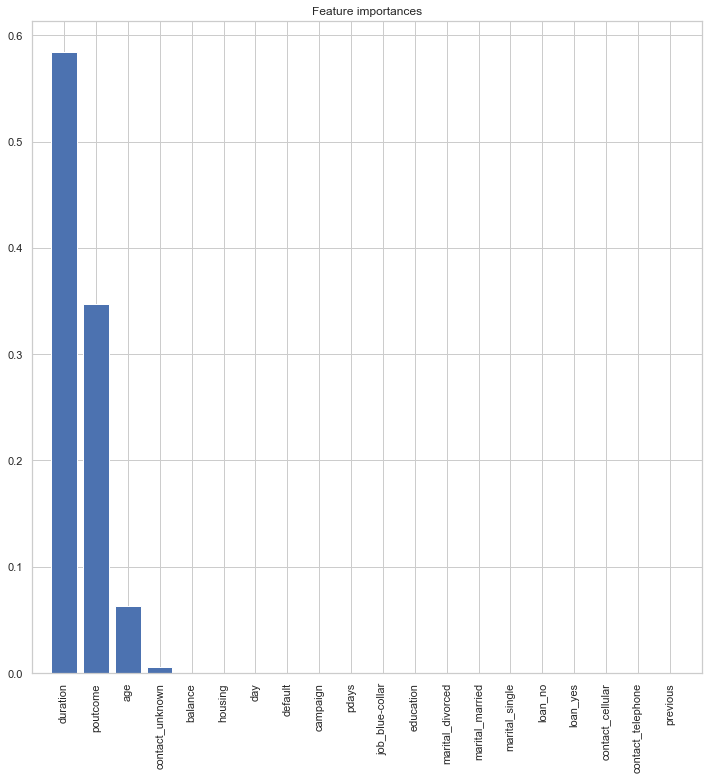

In [139]:
#print(feat_names)
## plot the importances ##
importances =dTreeR.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

<Figure size 504x360 with 0 Axes>

Method  Accuracy  Recall  Precision  f1_score  \
0       Logistics Regression     0.896   0.253      0.634     0.362   
0  Decision Tree Regularised     0.899   0.338      0.623     0.439   

   ROC AUC Score  
0          0.617  
0          0.656

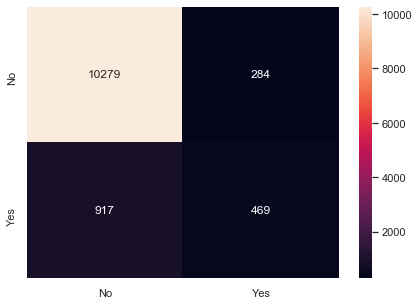

In [140]:
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df3_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df3_cm, annot=True ,fmt='g')

from sklearn.metrics import f1_score,precision_score,recall_score

tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regularised'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

<b>Build the ensemble models (Bagging and Boosting)</b> and note the model performance by using different matrices.<br>
The metrics are the <b>same</b> as in above model. 

In [141]:
# Ensemble technique - Bagging
from sklearn.ensemble import BaggingClassifier

bgcl1 = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl1 = bgcl1.fit(X_train, y_train)

0.9048455937735376


<Figure size 504x360 with 0 Axes>

Method  Accuracy  Recall  Precision  f1_score  \
0       Logistics Regression     0.896   0.253      0.634     0.362   
0  Decision Tree Regularised     0.899   0.338      0.623     0.439   
0                    Bagging     0.905   0.487      0.613     0.543   

   ROC AUC Score  
0          0.617  
0          0.656  
0          0.723

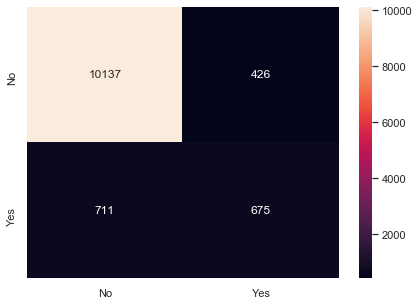

In [142]:
y_predict = bgcl1.predict(X_test)

print(bgcl1.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df4_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df4_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

<b>Ensemble Techniques</b> : Boosting using <b>adaptive boosting</b>

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x202dae43b88>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

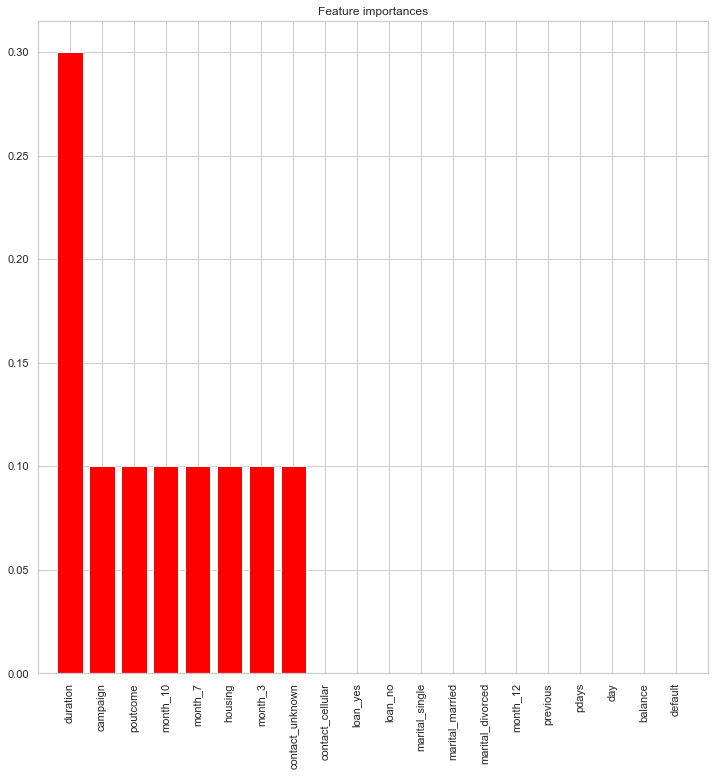

In [143]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl1 = abcl.fit(X_train, y_train)
feat_names = X_train.columns.values
#print(feat_names)
## plot the importances ##
importances = abcl1.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="red", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

0.8982341618545485


<Figure size 504x360 with 0 Axes>

Method  Accuracy  Recall  Precision  f1_score  \
0       Logistics Regression     0.896   0.253      0.634     0.362   
0  Decision Tree Regularised     0.899   0.338      0.623     0.439   
0                    Bagging     0.905   0.487      0.613     0.543   
0          adaptive boosting     0.898   0.352      0.605     0.445   

   ROC AUC Score  
0          0.617  
0          0.656  
0          0.723  
0          0.661

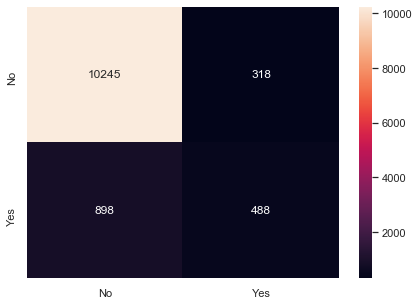

In [144]:
y_predict = abcl1.predict(X_test)
print(abcl1.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df5_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df5_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['adaptive boosting'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

<b>Ensemble Techniques</b> : Boosting using <b>gradient boosting</b>

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x202dada87c8>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

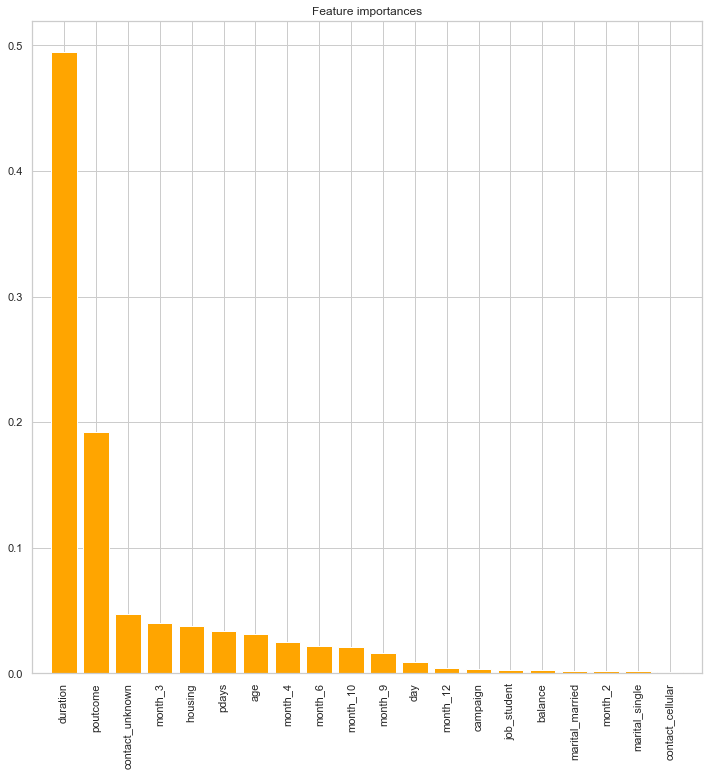

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
feat_names = X_train.columns.values
#print(feat_names)
## plot the importances ##
importances = gbcl.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="orange", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

0.9055151058665997


<Figure size 504x360 with 0 Axes>

Method  Accuracy  Recall  Precision  f1_score  \
0       Logistics Regression     0.896   0.253      0.634     0.362   
0  Decision Tree Regularised     0.899   0.338      0.623     0.439   
0                    Bagging     0.905   0.487      0.613     0.543   
0          adaptive boosting     0.898   0.352      0.605     0.445   
0          gradient boosting     0.906   0.380      0.662     0.482   

   ROC AUC Score  
0          0.617  
0          0.656  
0          0.723  
0          0.661  
0          0.677

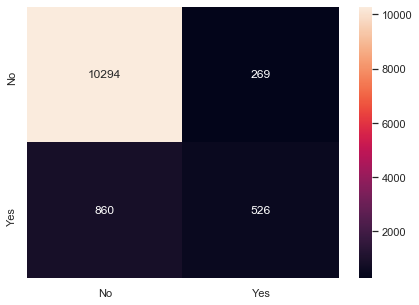

In [146]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df6_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df6_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['gradient boosting'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

### Further optimisation and Cross Validation of the Algorythms

In [149]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier



dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(n_estimators= 50),
    "AdaBoost": AdaBoostClassifier(n_estimators= 50, learning_rate=1.0, random_state=22),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18)}

In [150]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [151]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 2.15 s
trained Nearest Neighbors in 0.78 s
trained Linear SVM in 12.59 s
trained Gradient Boosting Classifier in 3.64 s
trained Bagging in 6.99 s
trained AdaBoost in 1.14 s
trained Decision Tree in 0.21 s
trained Random Forest in 0.45 s
                     classifier  train_score  training_time
6                 Decision Tree        1.000          0.214
4                       Bagging        1.000          6.987
7                 Random Forest        0.996          0.455
1             Nearest Neighbors        0.914          0.780
3  Gradient Boosting Classifier        0.912          3.639
5                      AdaBoost        0.900          1.142
0           Logistic Regression        0.899          2.150
2                    Linear SVM        0.880         12.593


### Avoiding Overfitting:
Brief Description of Overfitting?<br>
This is an error in the modeling algorithm that takes into consideration random noise in the fitting process rather than the pattern itself. You can see that this occurs when the model gets an awsome score in the training set but when we use the test set (Unknown data for the model) we get an awful score. This is likely to happen because of overfitting of the data (taking into consideration random noise in our pattern). What we want our model to do is to take the overall pattern of the data in order to correctly classify whether a potential client will suscribe to a term Target or not. In the examples above, it is most likely that the Decision Tree Classifier and Random Forest classifiers are overfitting since they both give us nearly perfect scores (100% and 99%) accuracy scores. <br><br>


How can we avoid Overfitting?<br>
The best alternative to avoid overfitting is to use cross validation. Taking the training test and splitting it. For instance, if we split it by 3, 2/3 of the data or 66% will be used for training and 1/3 33% will be used or testing and we will do the testing process three times. This algorithm will iterate through all the training and test sets and the main purpose of this is to grab the overall pattern of the data.

In [152]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
#svc_clf = SVC()
#svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
#svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
#rand_clf = RandomForestClassifier(n_estimators=18)
#rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
#rand_mean = rand_scores.mean()

bagg_clf = BaggingClassifier(n_estimators= 50)
bagg_scores = cross_val_score(bagg_clf, X_train, y_train, cv=3)
bagg_mean = bagg_scores.mean()

AdB_clf = AdaBoostClassifier(n_estimators= 50, learning_rate=1.0, random_state=22)
AdB_scores = cross_val_score(AdB_clf, X_train, y_train, cv=3)
AdB_mean = AdB_scores.mean()


In [153]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'KNN', 'Dec Tree', 'Grad B CLF', 'Bagging', 'AdBoost'], 
    'Crossval Mean Scores': [log_reg_mean, knn_mean, tree_mean, grad_mean, bagg_mean, AdB_mean]}

result_df = pd.DataFrame(data=d)

In [154]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
3     Grad B CLF                 0.907
4        Bagging                 0.904
0  Logistic Reg.                 0.898
5        AdBoost                 0.898
1            KNN                 0.885
2       Dec Tree                 0.872

The Best Model after applying a lot of ensemble Techniques prooved to be Gradient Boosting.

Several supervised machine learning models were used to build a model that will help the marketing team of the Bank to identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. On the Dataset predictive models (i.e. linear regression, KNN, Decision tree were developoed. Alternatively, other approaches such as bagging and random forests are built on the idea of building an ensemble of models where each individual model predicts the outcome and then the ensemble simply averages the predicted values. The family of boosting methods is based on a different, constructive strategy of ensemble formation.

Gradient boosting, just like any other ensemble machine learning procedure, sequentially adds predictors to the ensemble and follows the sequence in correcting preceding predictors to arrive at an accurate predictor at the end of the procedure. Adaboost corrects its previous errors by tuning the weights for every incorrect observation in every iteration, but gradient boosting aims at fitting a new predictor in the residual errors committed by the preceding predictor.

Gradient boosting utilizes the gradient descent to pinpoint the challenges in the learners’ predictions used previously. The previous error is highlighted, and, by combining one weak learner to the next learner, the error is reduced significantly over time.
Often provides predictive accuracy that cannot be beat.
Lots of flexibility - can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.
No data pre-processing required - often works great with categorical and numerical values as is.
